# **📚 1. Import thư viện cần thiết**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error

# Cài đặt chung cho matplotlib và seaborn
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# **📚 2. Đọc dữ liệu và xử lí dữ liệu**

In [ ]:
# Đọc dữ liệu từ URL
DATA_PATH = "https://redcap.huph.edu.vn/ddp/tsa/nhom4.csv"
df = pd.read_csv(DATA_PATH, sep=',', decimal='.', na_values=-200)

# Chọn các cột cần thiết
cols = ['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
        'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)',
        'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']
df = df[cols]

# Chuyển đổi sang datetime và đặt làm index
df['Timestamp'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df = df.drop(columns=['Date', 'Time']).set_index('Timestamp')

# Xử lý giá trị thiếu
df = df.dropna()

# Hiển thị thông tin cơ bản
print("Shape:", df.shape)
print("\nInfo:")
print(df.info())
print("\n5 dòng đầu tiên:")
print(df.head())

Shape: (827, 13)

Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 827 entries, 2004-03-10 18:00:00 to 2004-05-01 00:00:00
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         827 non-null    float64
 1   PT08.S1(CO)    827 non-null    float64
 2   NMHC(GT)       827 non-null    float64
 3   C6H6(GT)       827 non-null    float64
 4   PT08.S2(NMHC)  827 non-null    float64
 5   NOx(GT)        827 non-null    float64
 6   PT08.S3(NOx)   827 non-null    float64
 7   NO2(GT)        827 non-null    float64
 8   PT08.S4(NO2)   827 non-null    float64
 9   PT08.S5(O3)    827 non-null    float64
 10  T              827 non-null    float64
 11  RH             827 non-null    float64
 12  AH             827 non-null    float64
dtypes: float64(13)
memory usage: 90.5 KB
None

5 dòng đầu tiên:
                     CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  \
Timestamp                     

# **📚 3. Plot dữ liệu thô**

# 3.1 Plot chất ô nhiễm

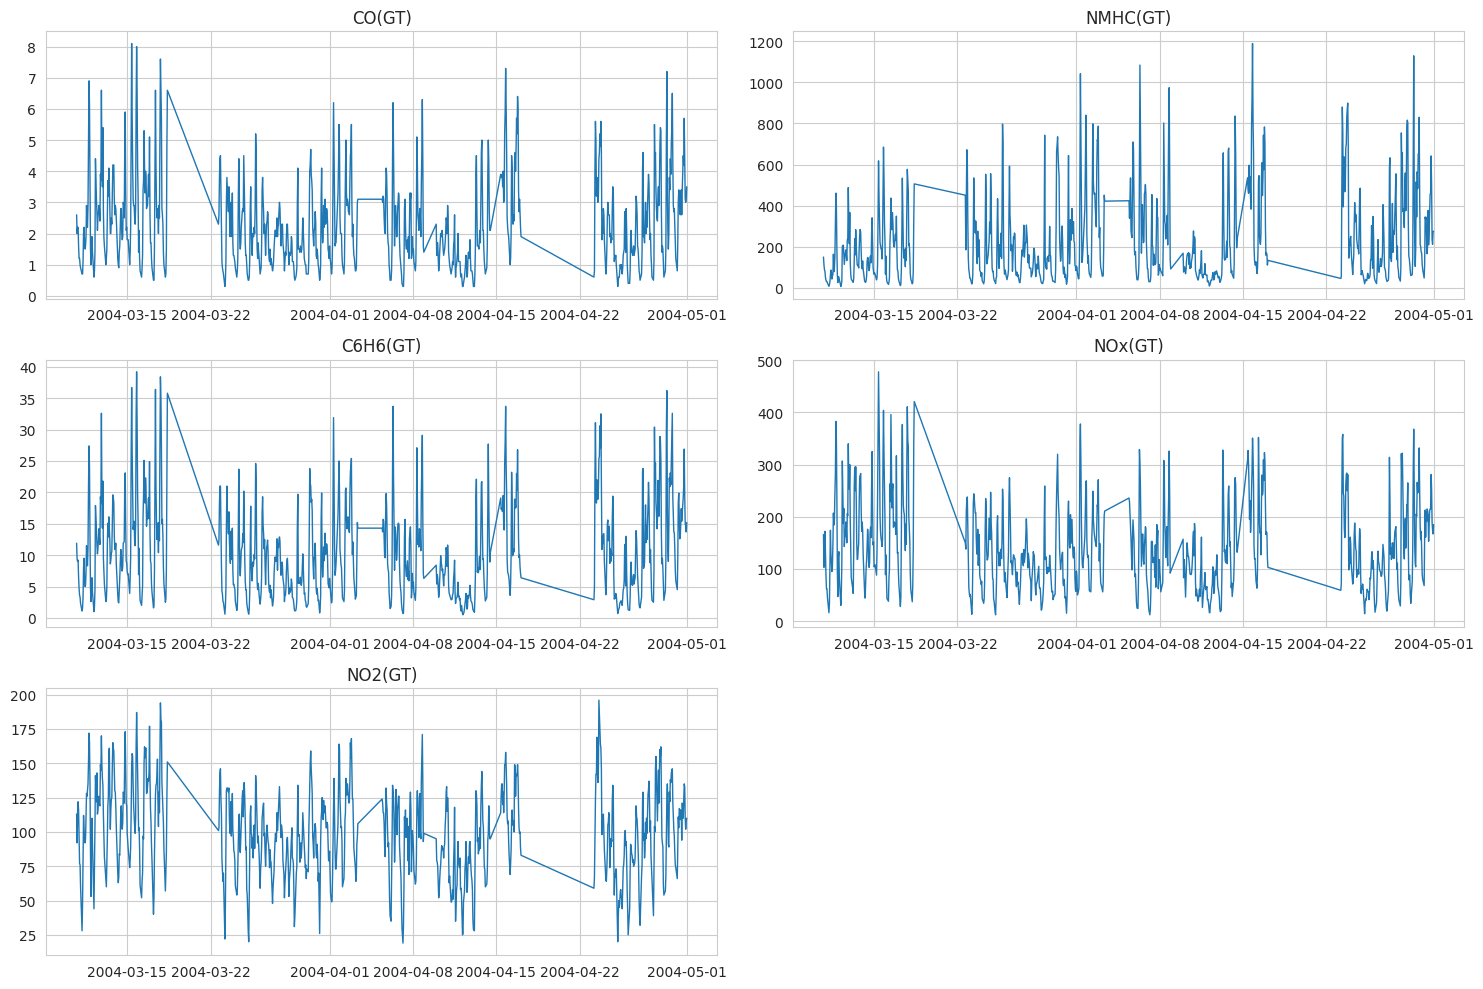

In [ ]:
plt.figure(figsize=(15, 10))
pollutants = ['CO(GT)', 'NMHC(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']
for i, col in enumerate(pollutants, 1):
    plt.subplot(3, 2, i)
    plt.plot(df.index, df[col], linewidth=1)
    plt.title(col)
plt.tight_layout()
plt.show()

# 3.2 Plot thời tiết

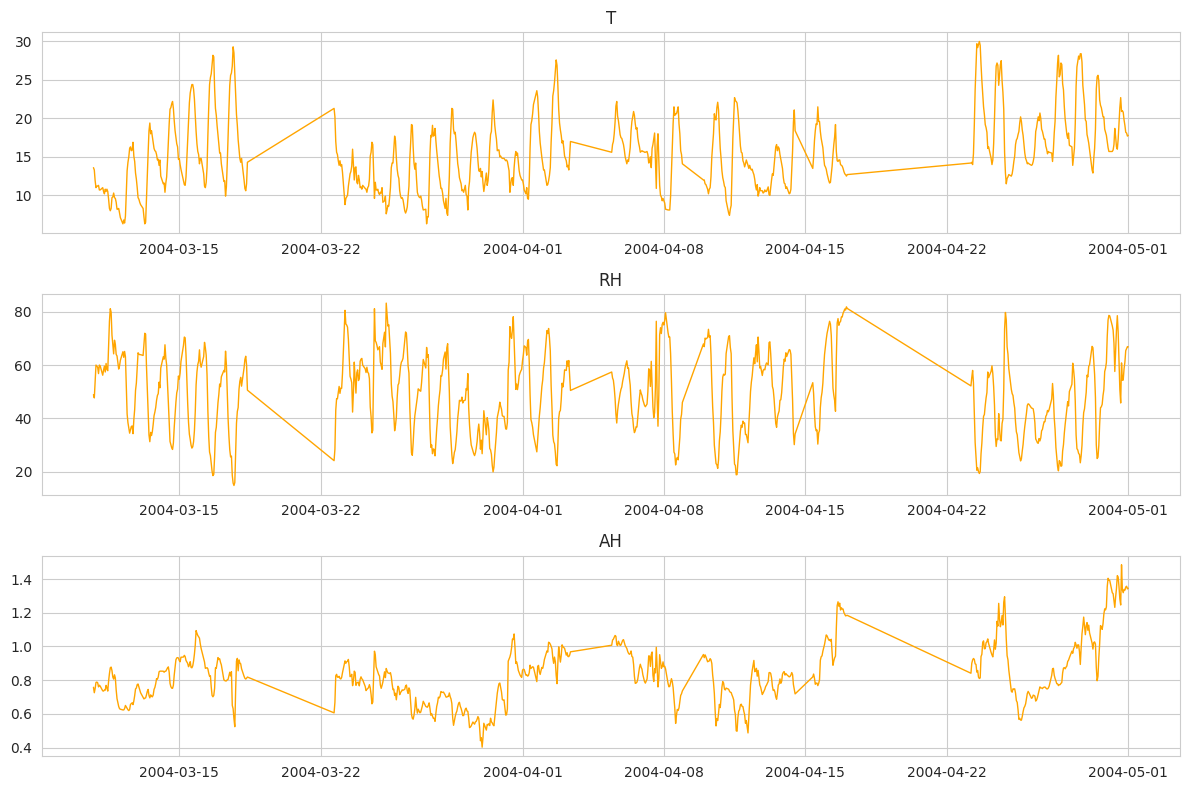

In [ ]:
plt.figure(figsize=(12, 8))
meteo = ['T', 'RH', 'AH']
for i, col in enumerate(meteo, 1):
    plt.subplot(3, 1, i)
    plt.plot(df.index, df[col], color='orange', linewidth=1)
    plt.title(col)
plt.tight_layout()
plt.show()

# 3.3 Plot sensor

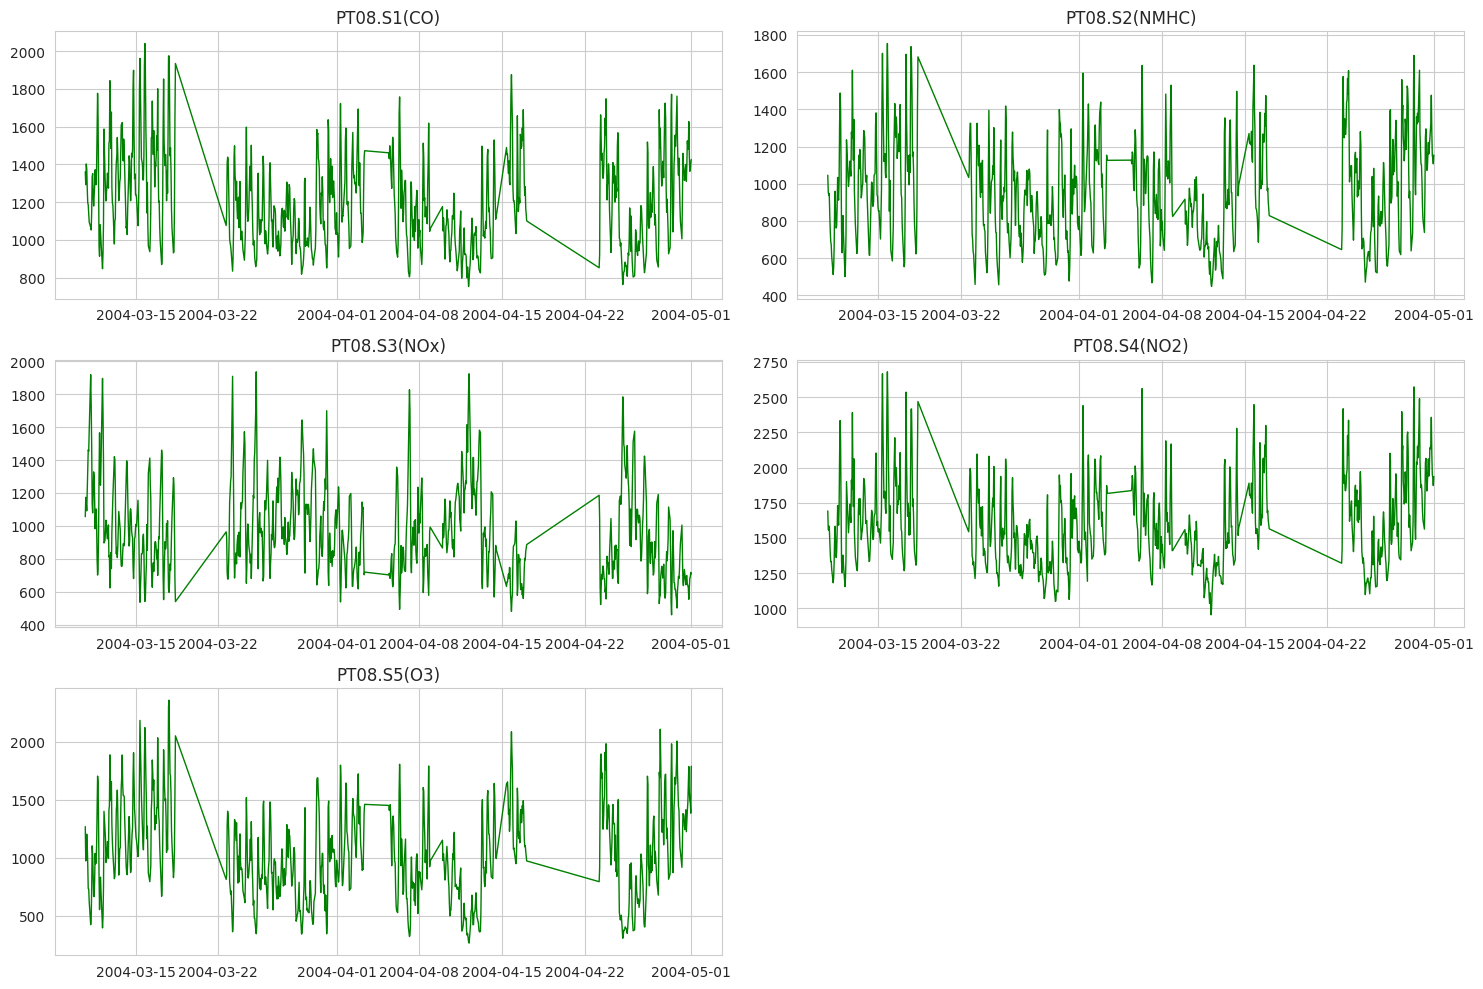

In [ ]:
plt.figure(figsize=(15, 10))
sensors = ['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)']
for i, col in enumerate(sensors, 1):
    plt.subplot(3, 2, i)
    plt.plot(df.index, df[col], color='green', linewidth=1)
    plt.title(col)
plt.tight_layout()
plt.show()

# **📚 4. Phân tích thành phần mùa vụ (Seasonal Decomposition)**


📚 4. Phân tích thành phần mùa vụ (Seasonal Decomposition):


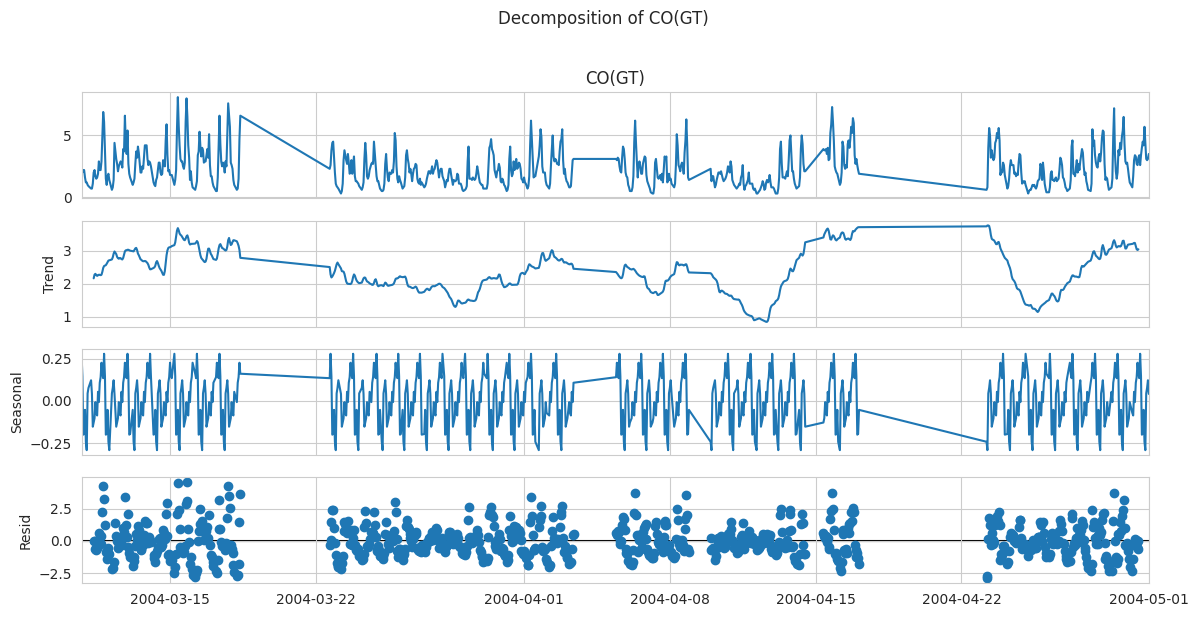

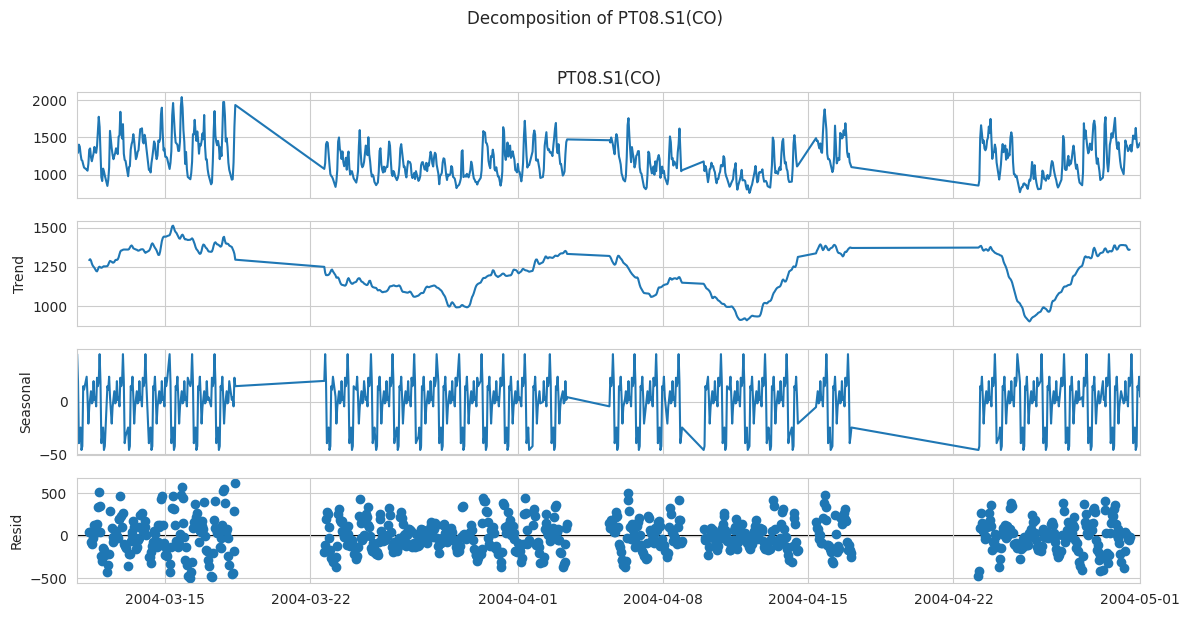

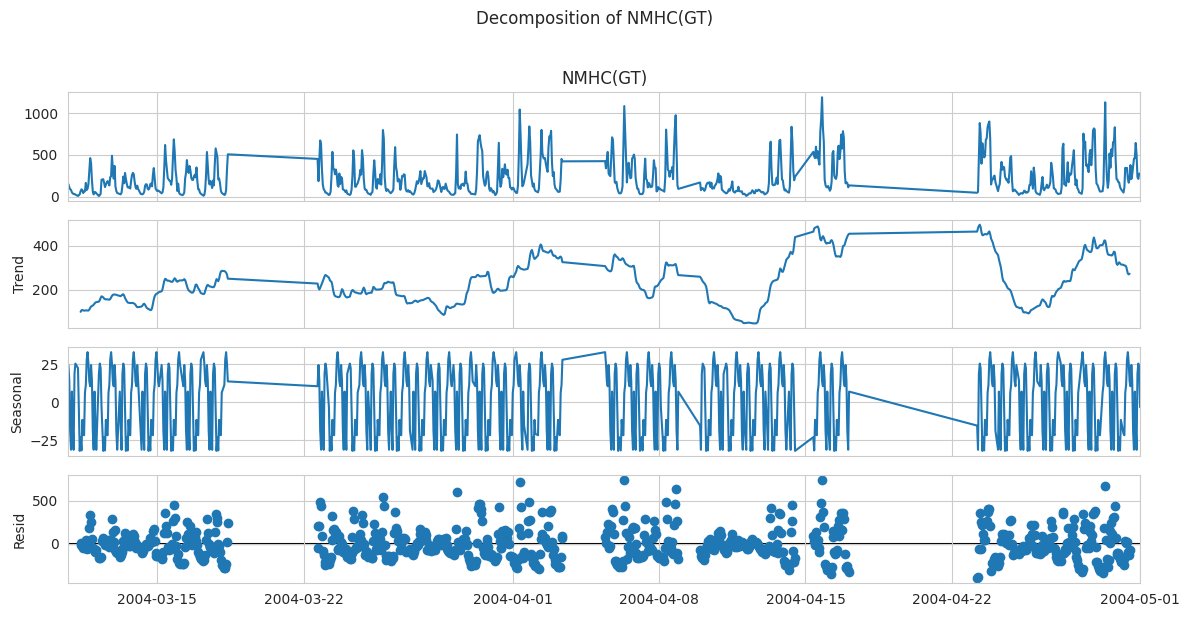

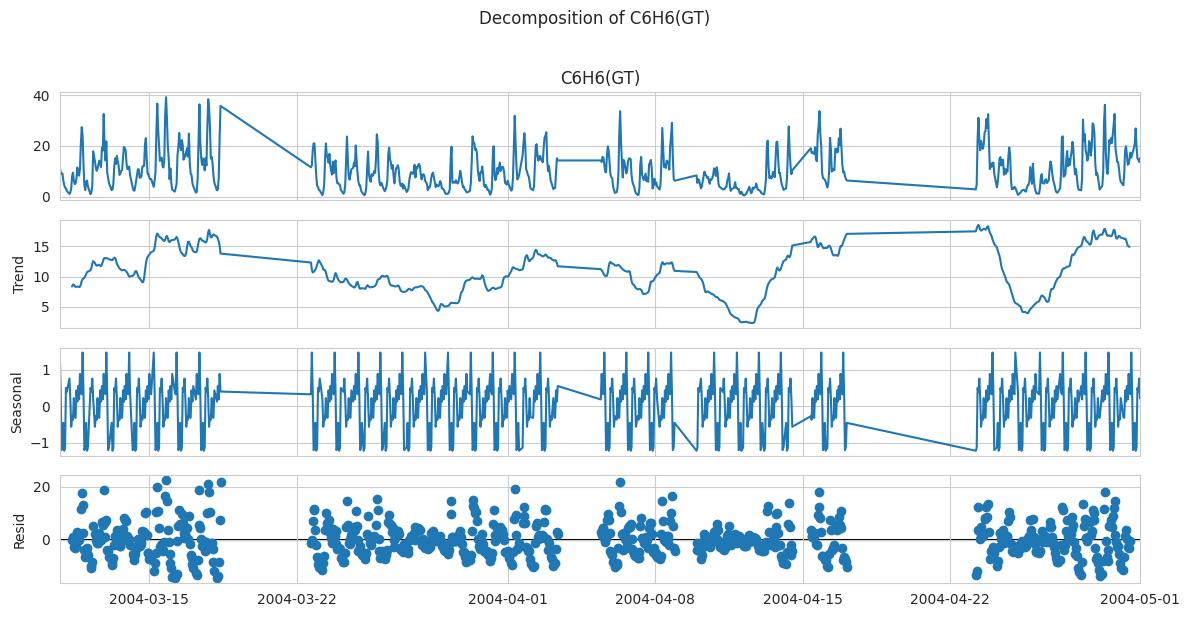

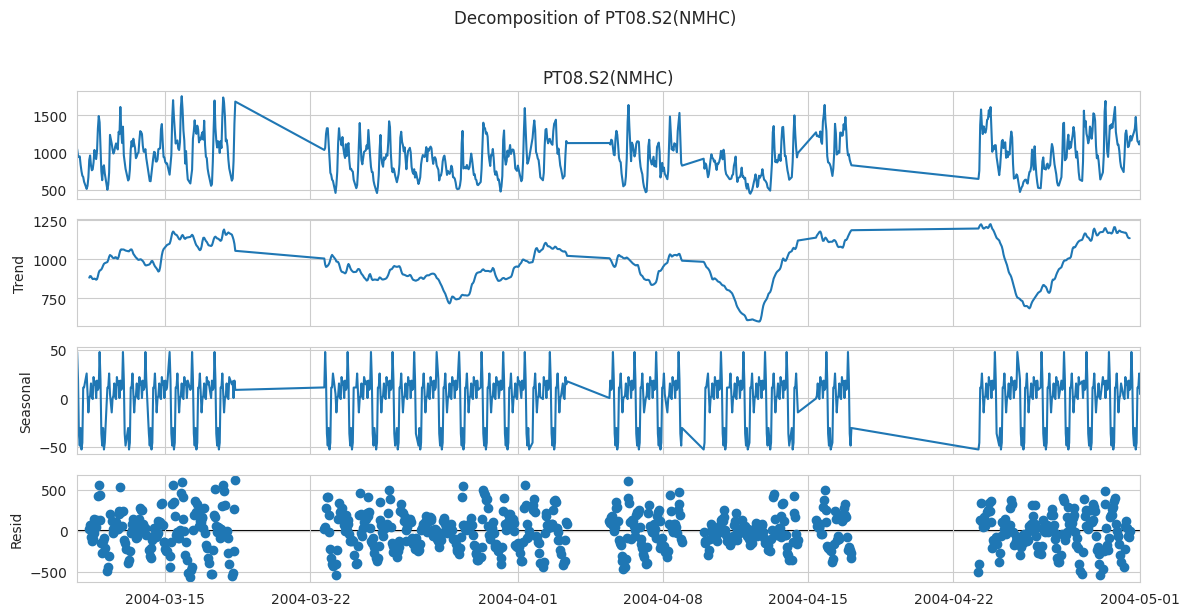

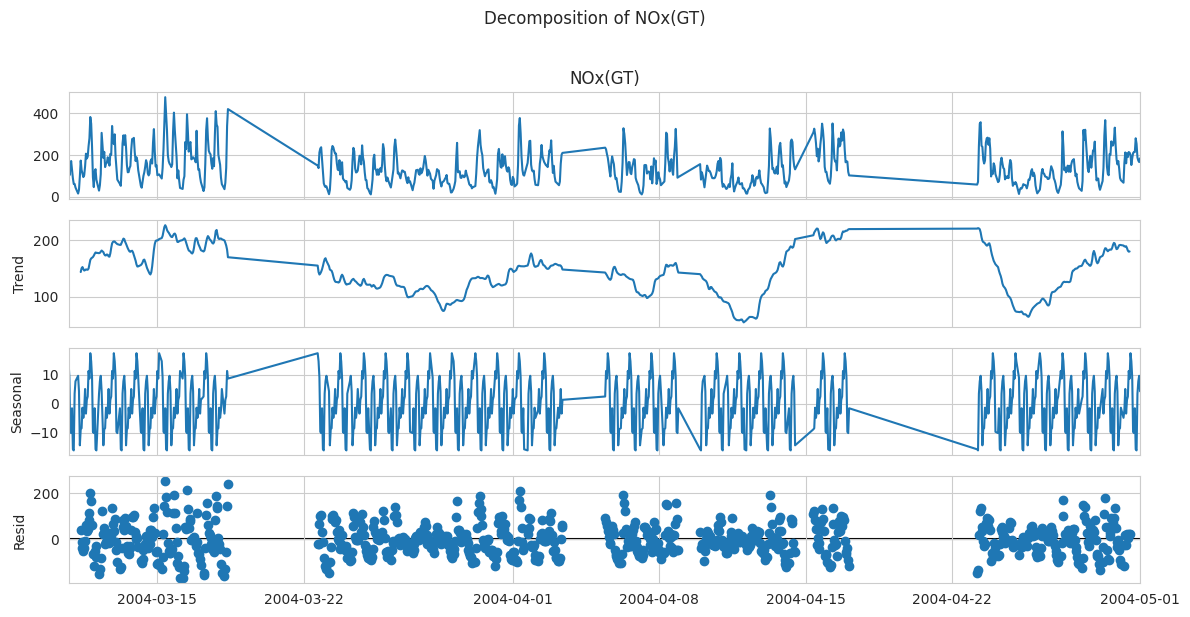

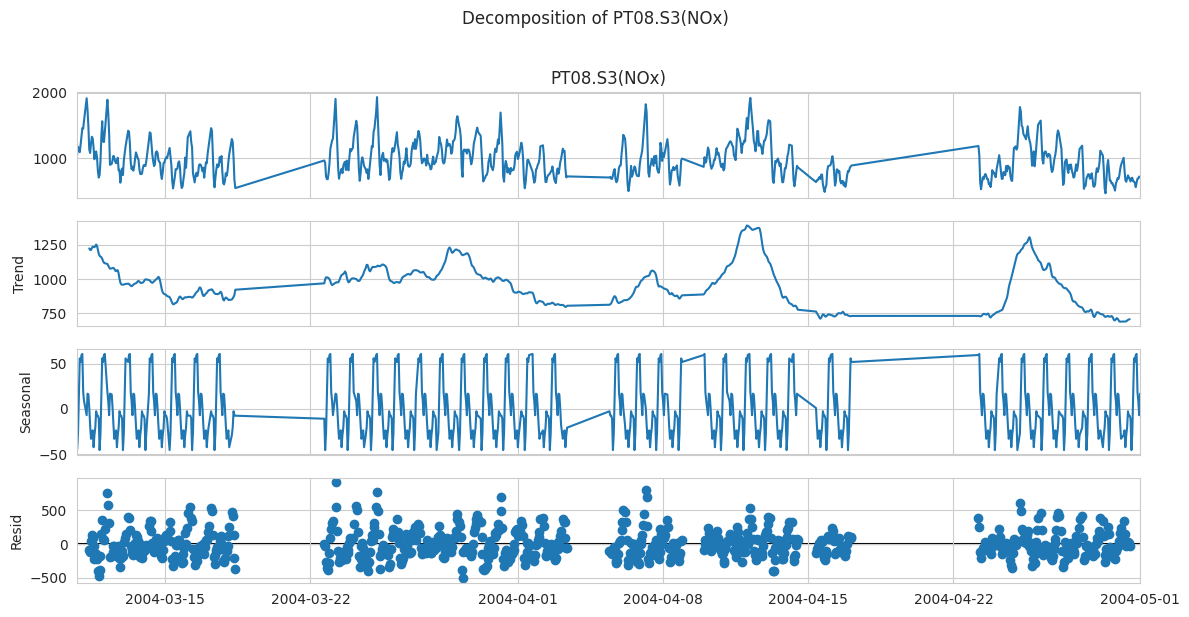

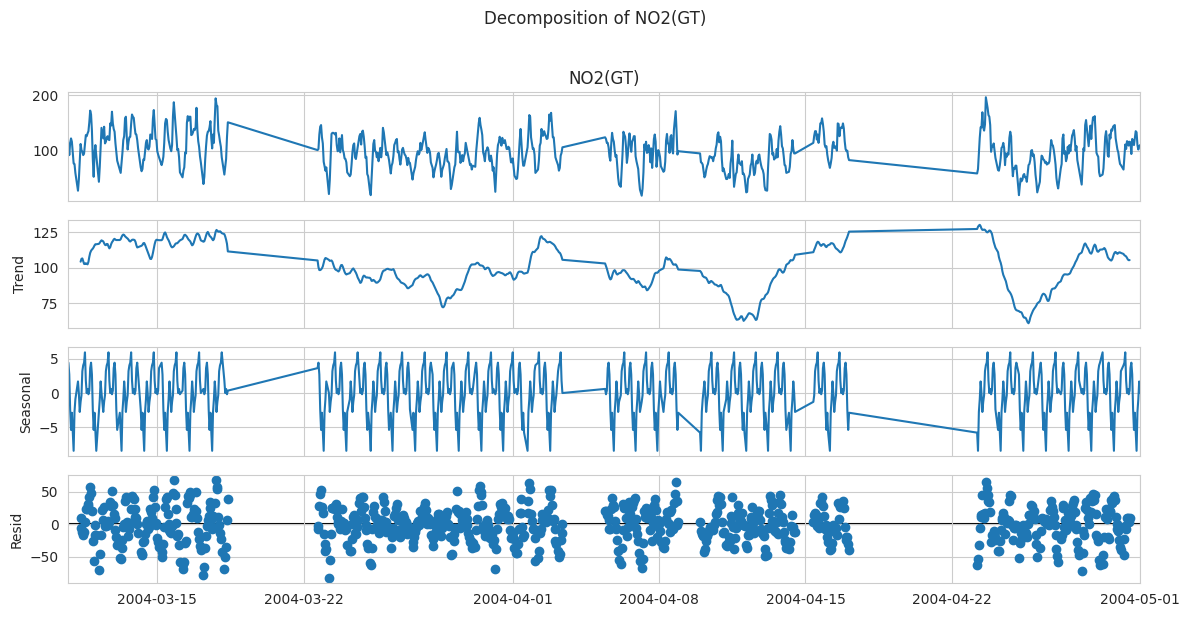

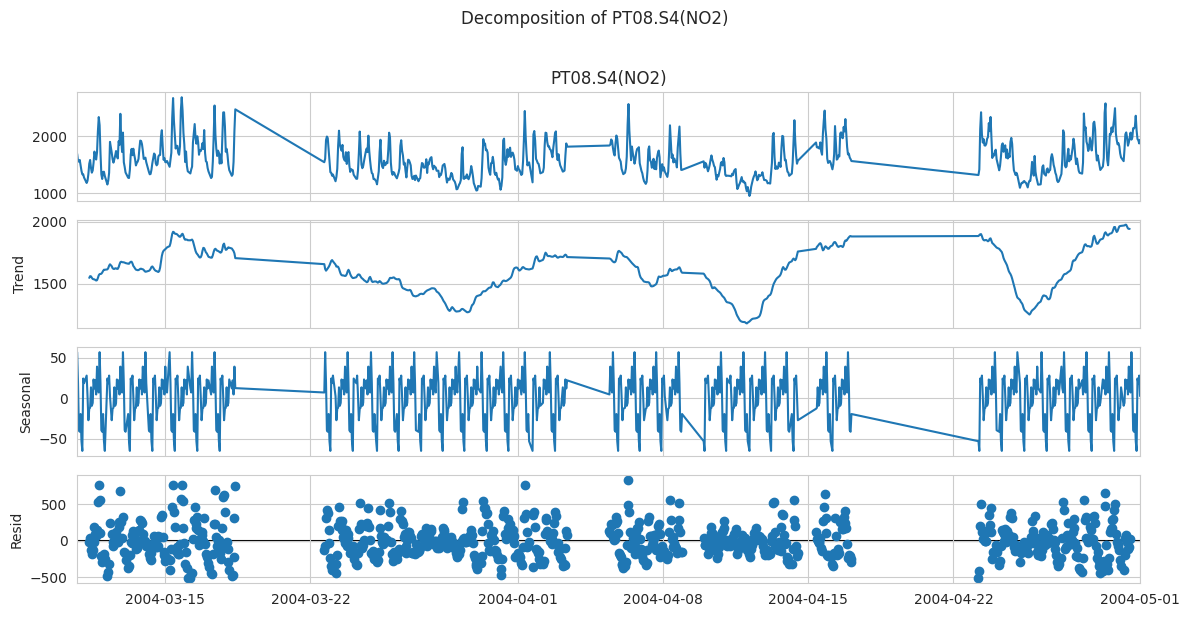

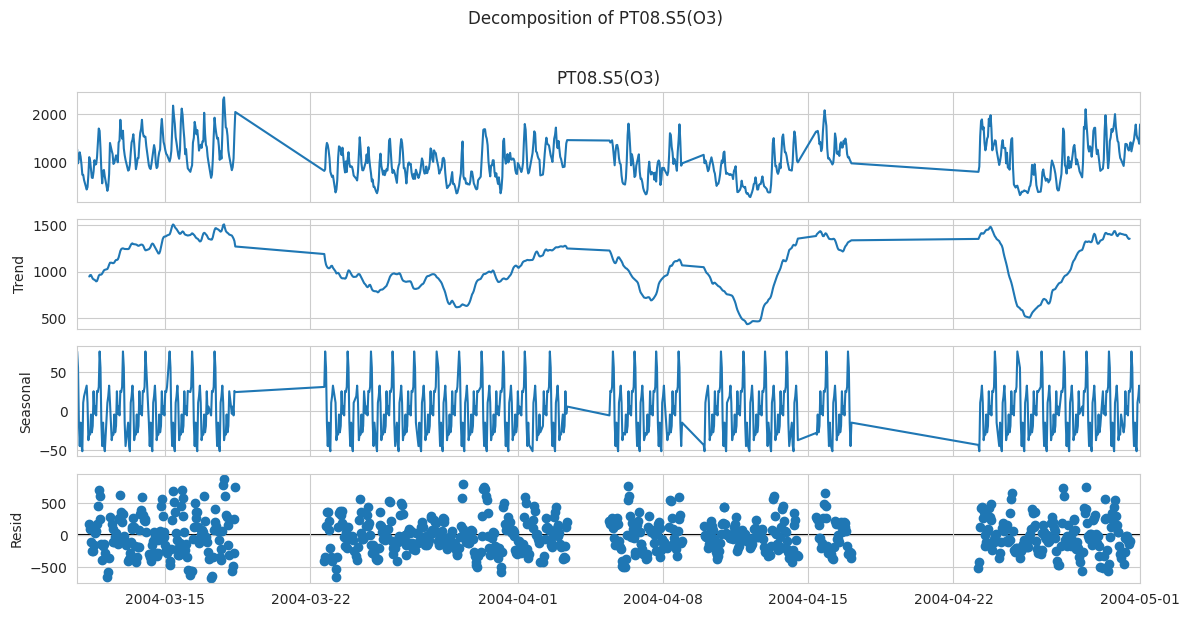

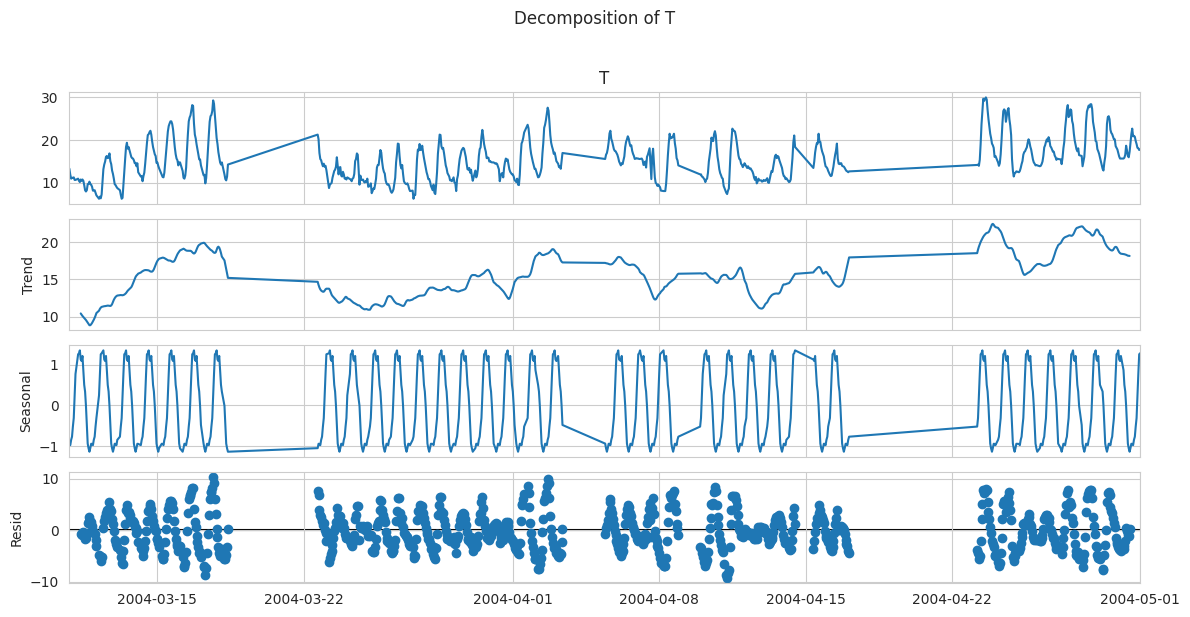

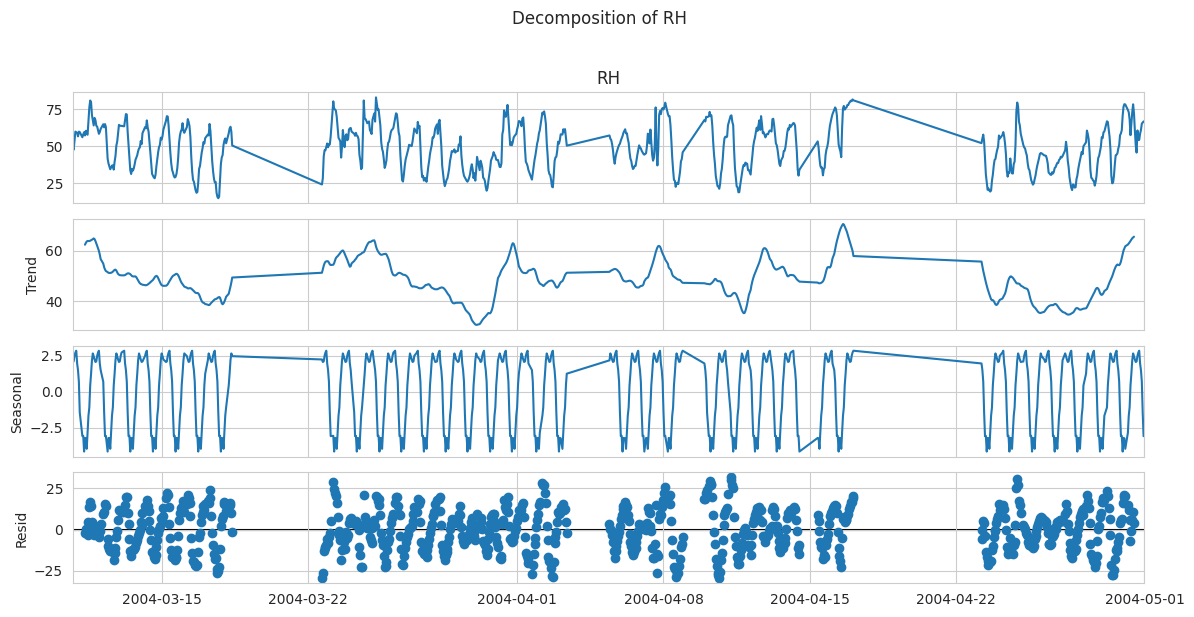

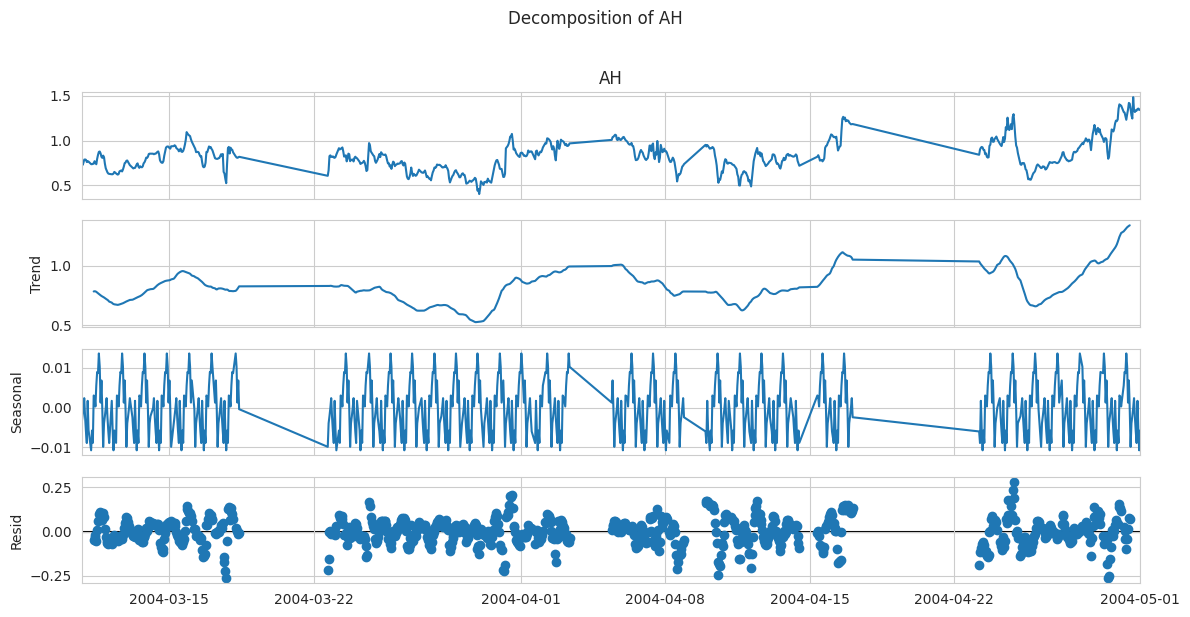

In [ ]:
print("\n📚 4. Phân tích thành phần mùa vụ (Seasonal Decomposition):")
for col in df.columns:
    series = df[col].dropna()
    if len(series) >= 48:  # Đảm bảo đủ dữ liệu cho decomposition
        try:
            result = seasonal_decompose(series, model='additive', period=24)
            result.plot()
            plt.suptitle(f"Decomposition of {col}", y=1.02)
            plt.tight_layout()
            plt.show()
        except Exception as e:
            print(f"⚠ Không thể decomposition biến {col}: {e}")
    else:
        print(f"⚠ Biến {col} không đủ dữ liệu để decomposition (ít hơn 48 quan sát).")


# **📚 5. Kiểm tra tính dừng (ADF Test)**

In [ ]:
print("\n📚 5. Kiểm tra tính dừng (ADF Test):")
for col in df.columns:
    series = df[col].dropna()
    if len(series) > 0:
        try:
            result = adfuller(series)
            print(f"\nVariable: {col}")
            print(f'ADF Statistic: {result[0]:.4f}')
            print(f'p-value: {result[1]:.4f}')
            print('Critical Values:')
            for key, value in result[4].items():
                print(f'   {key}: {value:.4f}')
            if result[1] > 0.05:
                print("=> Chuỗi không dừng (non-stationary)")
            else:
                print("=> Chuỗi dừng (stationary)")
        except Exception as e:
            print(f"⚠ Không thể kiểm tra ADF cho biến {col}: {e}")
    else:
        print(f"⚠ Biến {col} không có dữ liệu để kiểm tra ADF.")



📚 5. Kiểm tra tính dừng (ADF Test):

Variable: CO(GT)
ADF Statistic: -2.3366
p-value: 0.1604
Critical Values:
   1%: -3.4385
   5%: -2.8651
   10%: -2.5687
=> Chuỗi không dừng (non-stationary)

Variable: PT08.S1(CO)
ADF Statistic: -1.7679
p-value: 0.3965
Critical Values:
   1%: -3.4385
   5%: -2.8651
   10%: -2.5687
=> Chuỗi không dừng (non-stationary)

Variable: NMHC(GT)
ADF Statistic: -2.7028
p-value: 0.0735
Critical Values:
   1%: -3.4385
   5%: -2.8651
   10%: -2.5687
=> Chuỗi không dừng (non-stationary)

Variable: C6H6(GT)
ADF Statistic: -2.2617
p-value: 0.1846
Critical Values:
   1%: -3.4385
   5%: -2.8651
   10%: -2.5687
=> Chuỗi không dừng (non-stationary)

Variable: PT08.S2(NMHC)
ADF Statistic: -2.2452
p-value: 0.1903
Critical Values:
   1%: -3.4385
   5%: -2.8651
   10%: -2.5687
=> Chuỗi không dừng (non-stationary)

Variable: NOx(GT)
ADF Statistic: -2.3785
p-value: 0.1479
Critical Values:
   1%: -3.4385
   5%: -2.8651
   10%: -2.5687
=> Chuỗi không dừng (non-stationary)

Var

# **📚 6. Vẽ ACF và PACF**


📚 6. Vẽ ACF và PACF:


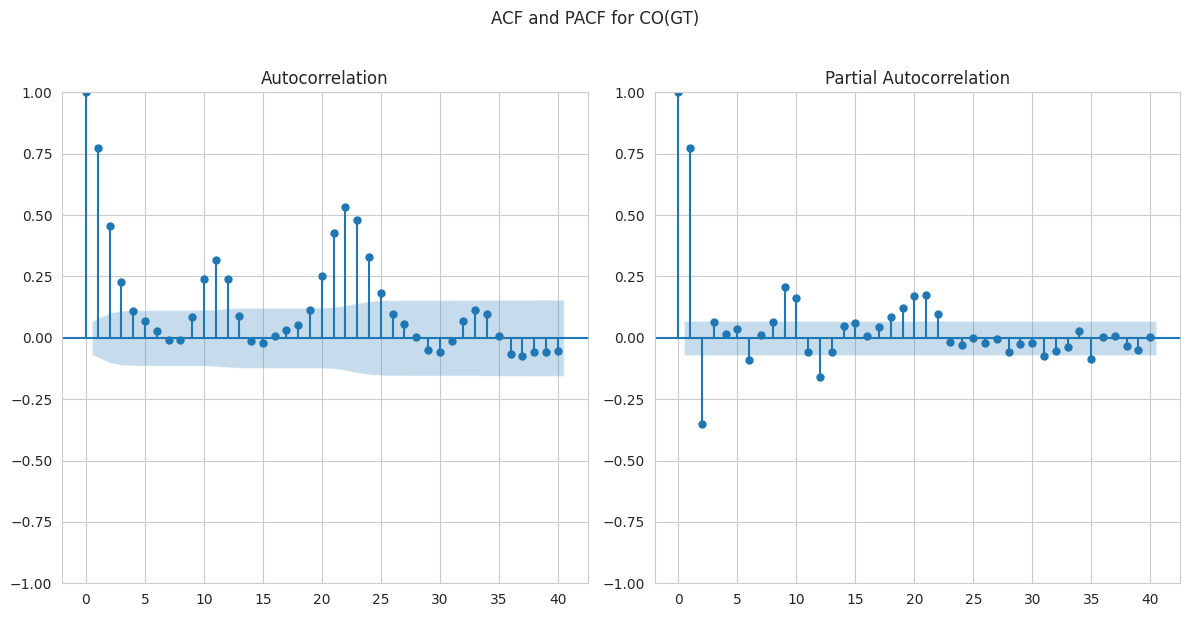

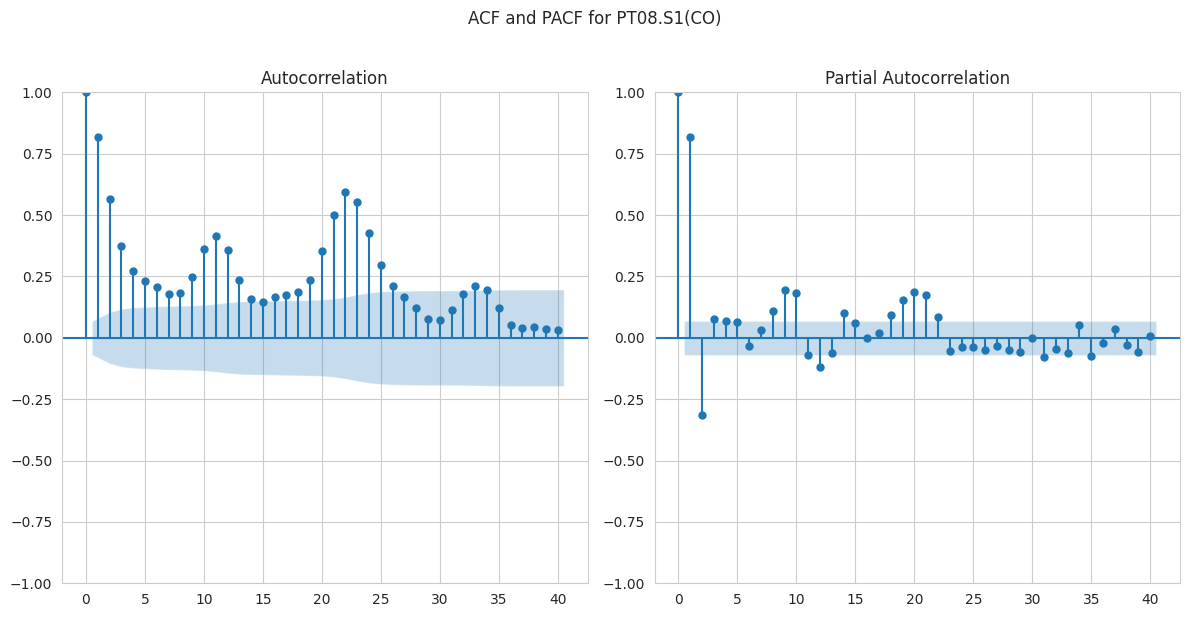

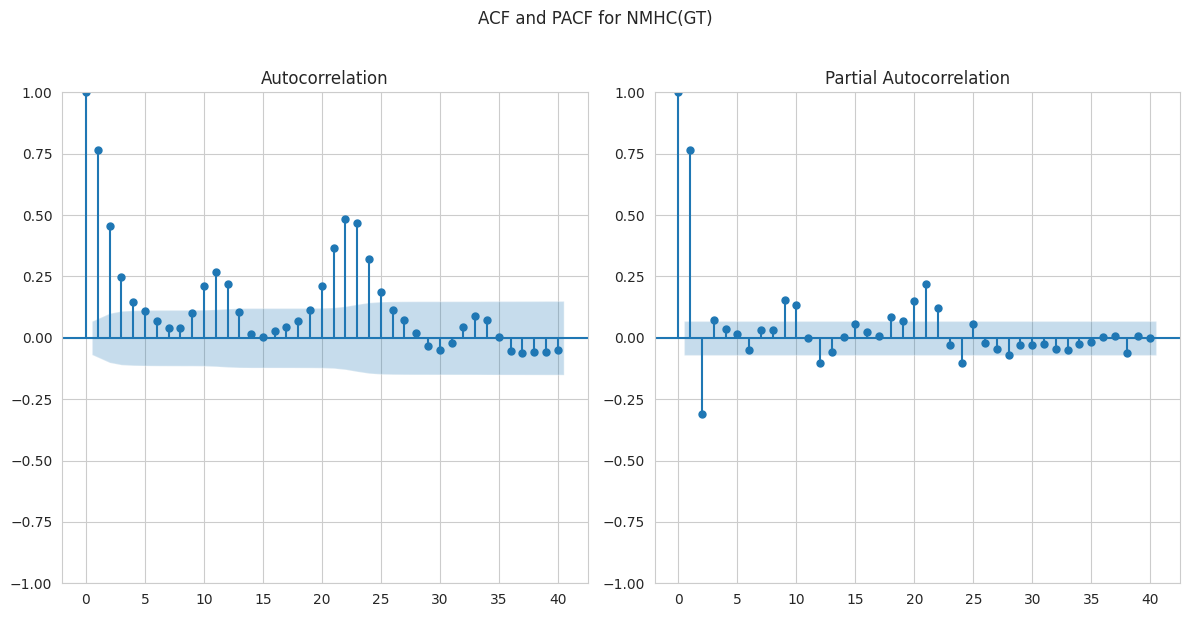

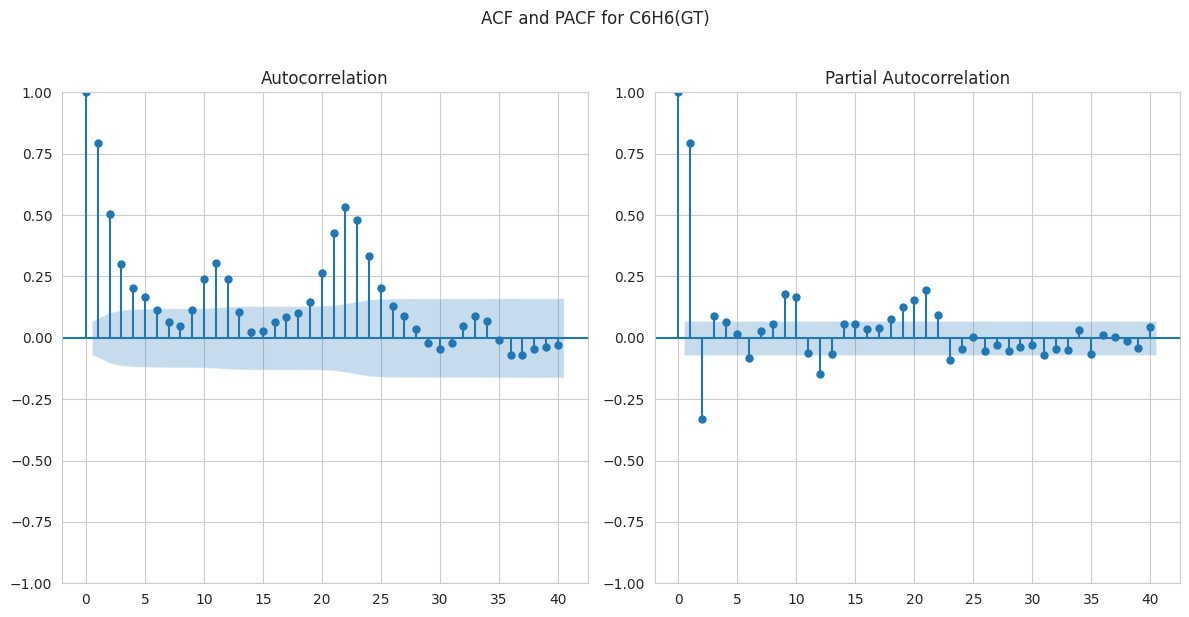

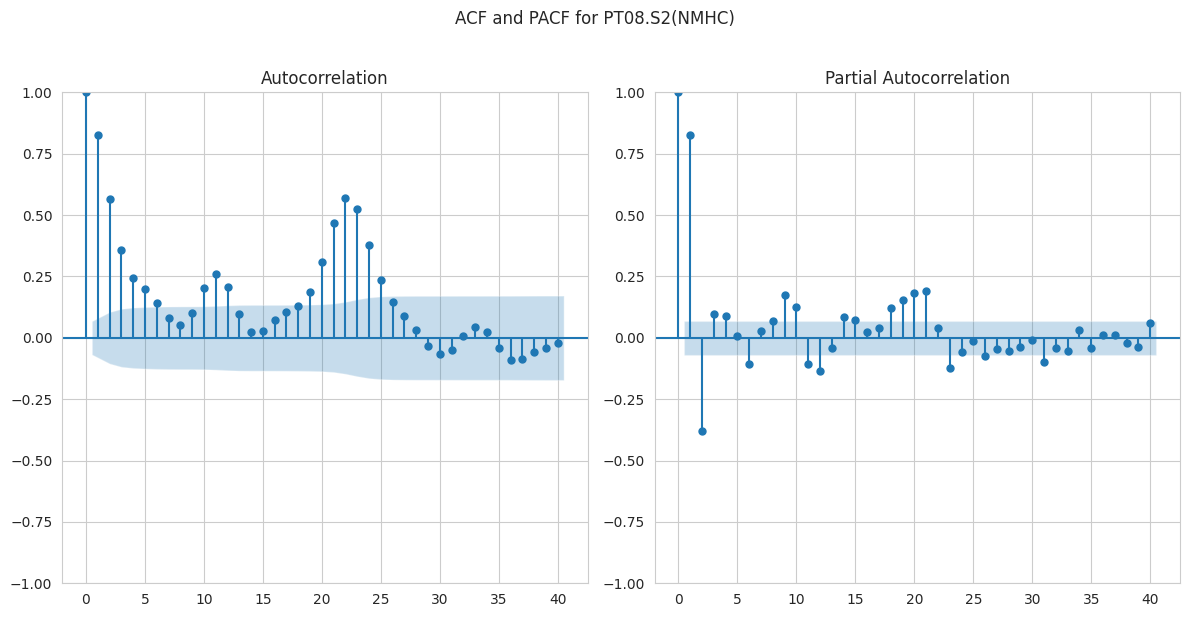

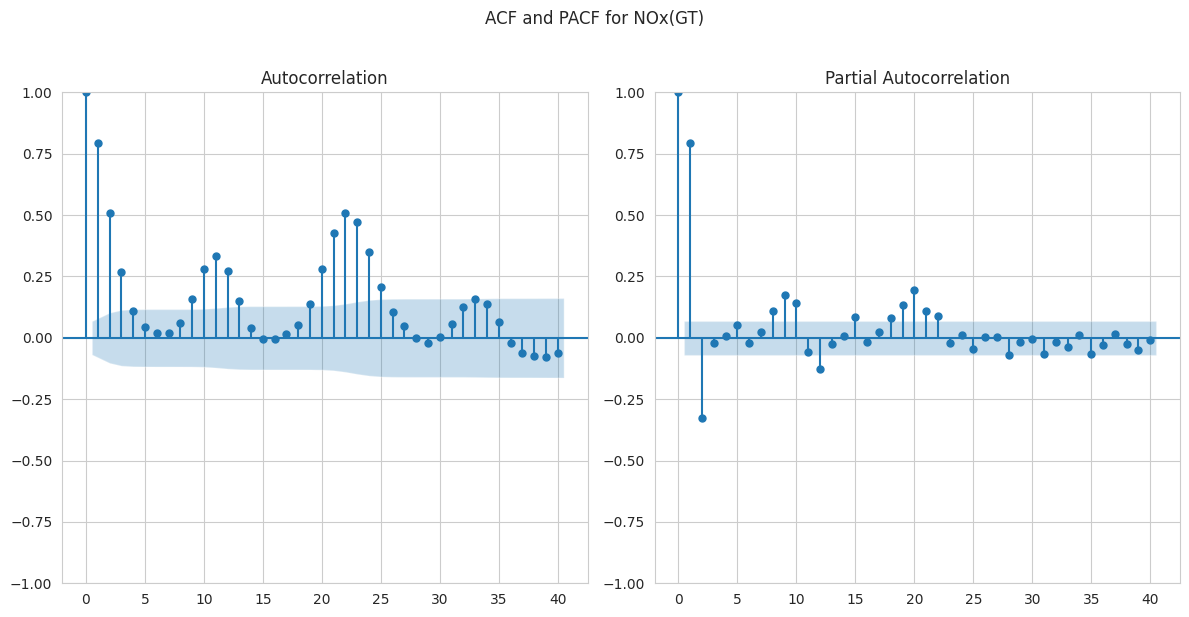

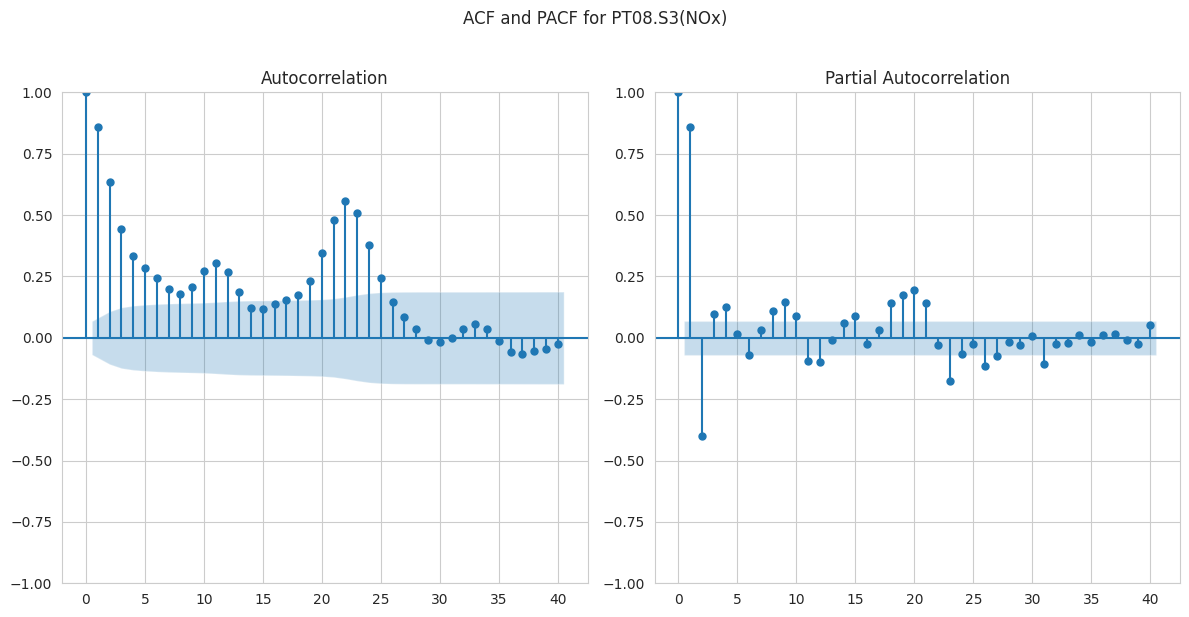

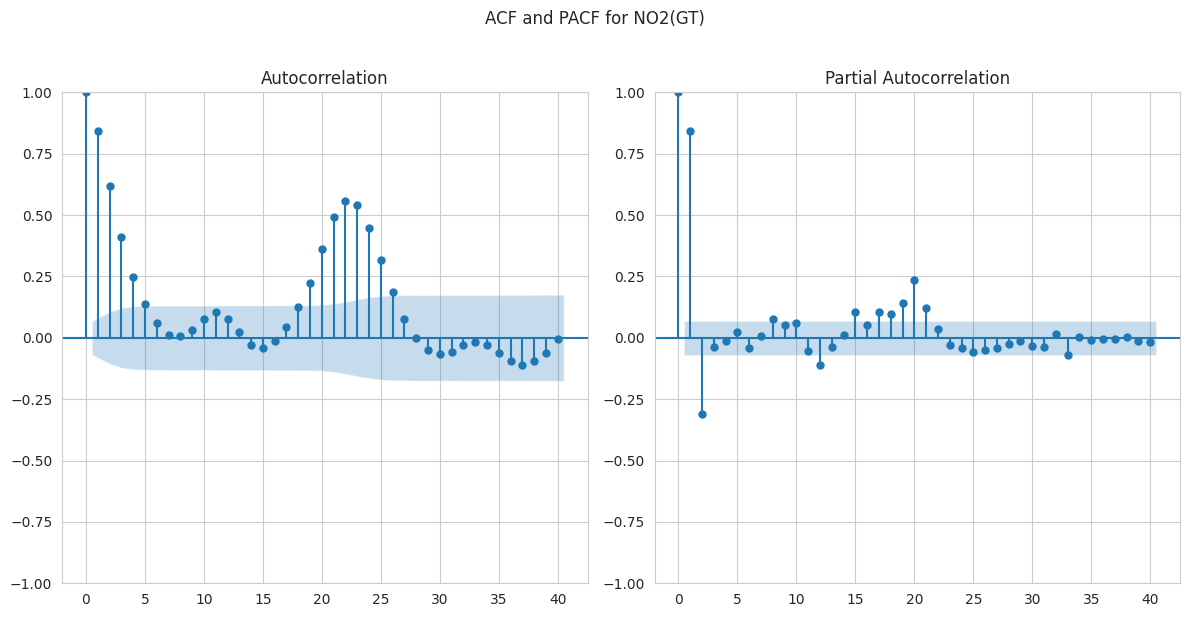

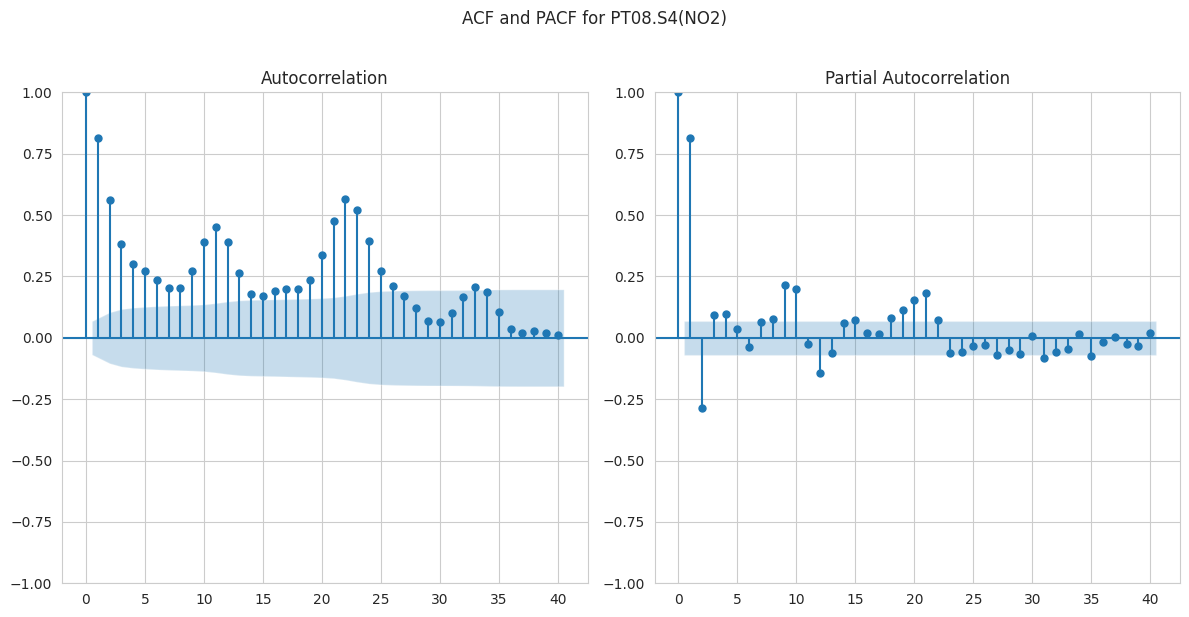

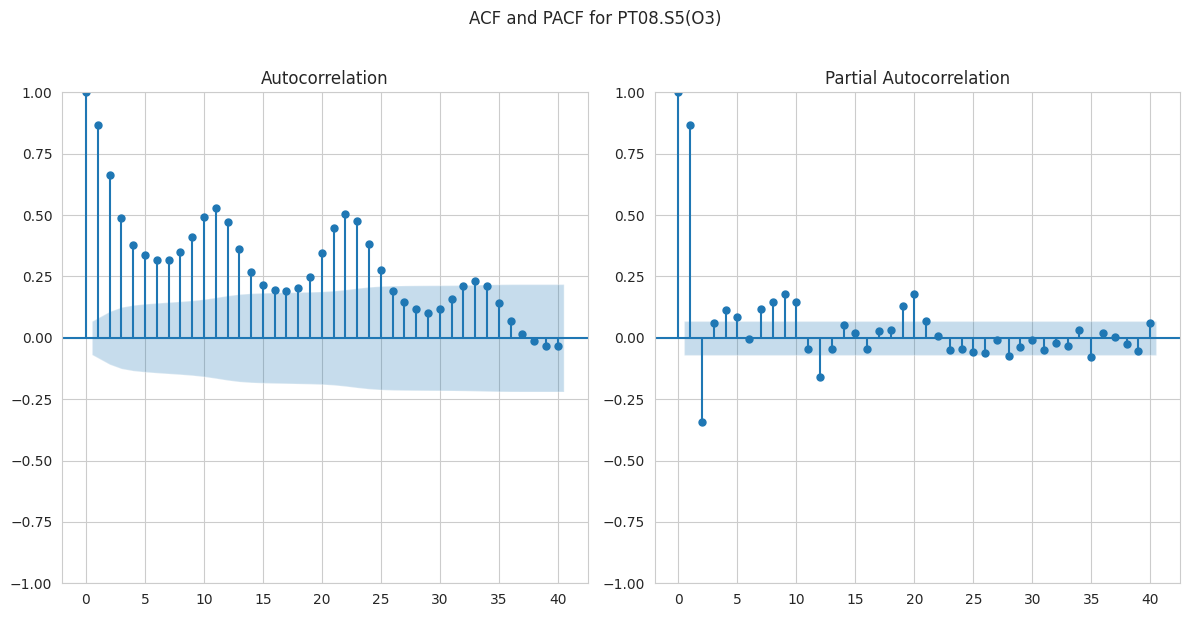

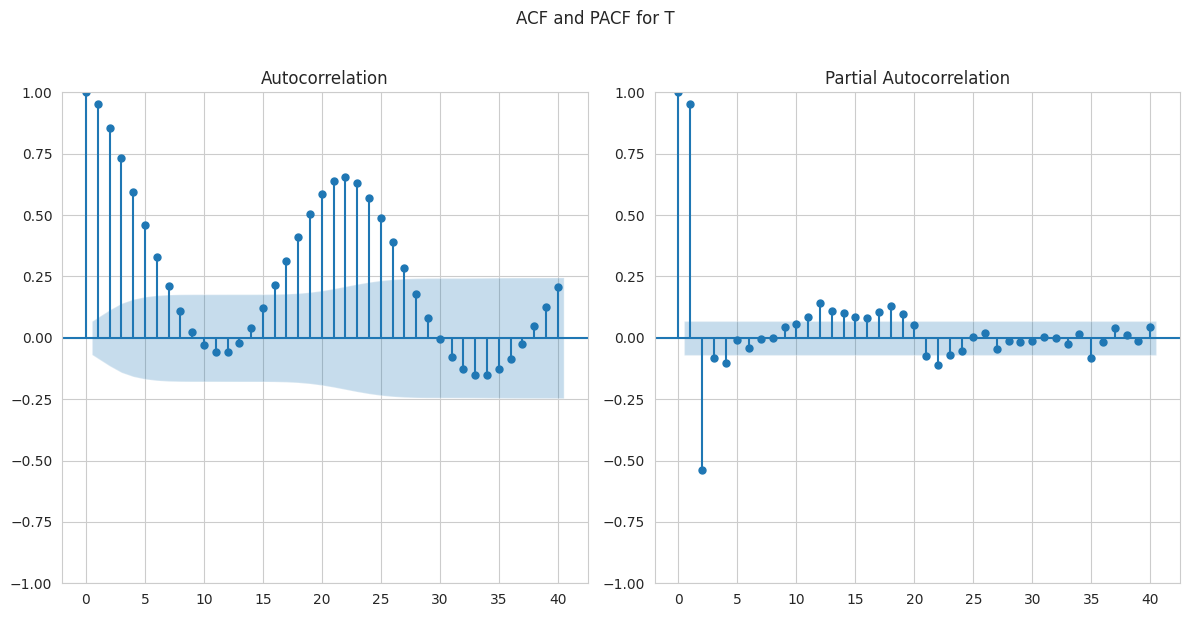

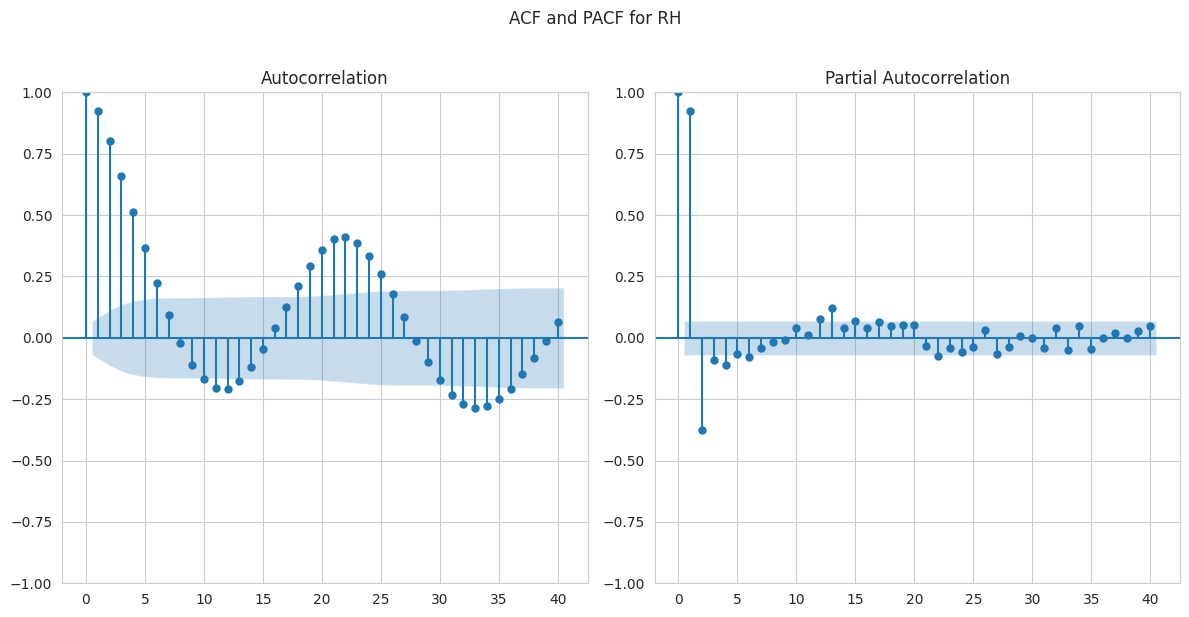

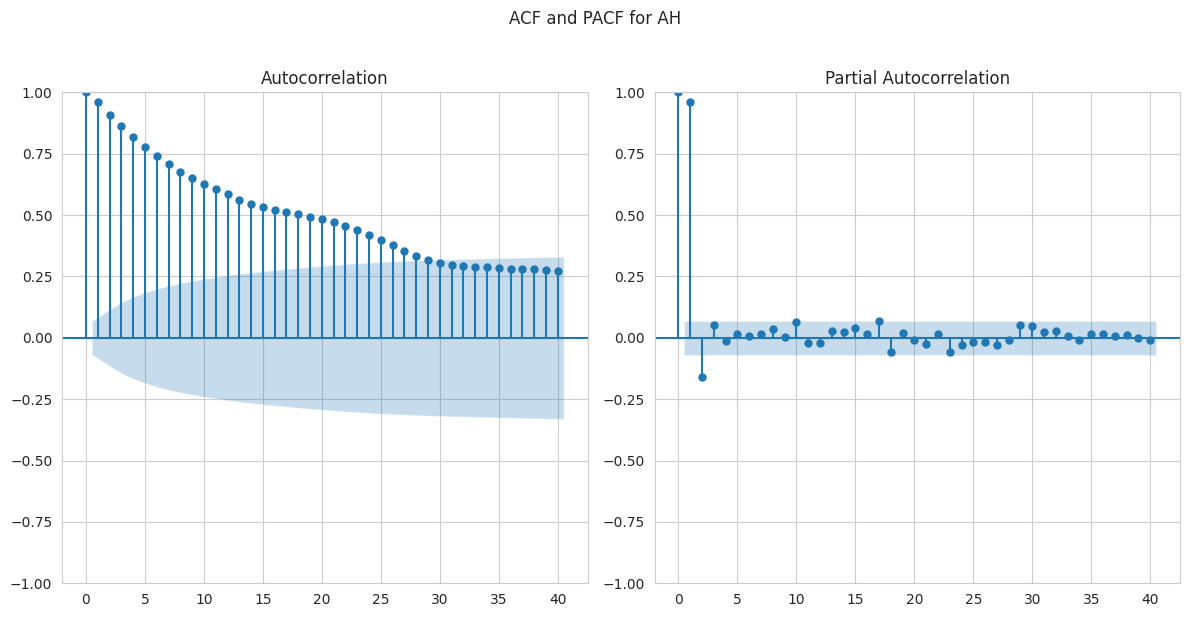

In [ ]:
print("\n📚 6. Vẽ ACF và PACF:")
for col in df.columns:
    series = df[col].dropna()
    if len(series) >= 50:  # Đảm bảo đủ dữ liệu để vẽ ACF, PACF
        try:
            plt.figure(figsize=(12, 6))
            plt.suptitle(f"ACF and PACF for {col}", y=1.02)

            plt.subplot(1, 2, 1)
            plot_acf(series, ax=plt.gca(), lags=40)

            plt.subplot(1, 2, 2)
            plot_pacf(series, ax=plt.gca(), lags=40, method='ywmle')

            plt.tight_layout()
            plt.show()
        except Exception as e:
            print(f"⚠ Không thể vẽ ACF/PACF cho biến {col}: {e}")
    else:
        print(f"⚠ Biến {col} không đủ dữ liệu để vẽ ACF/PACF.")


# **📚 7. Moving Average (Trung bình trượt 24h)**

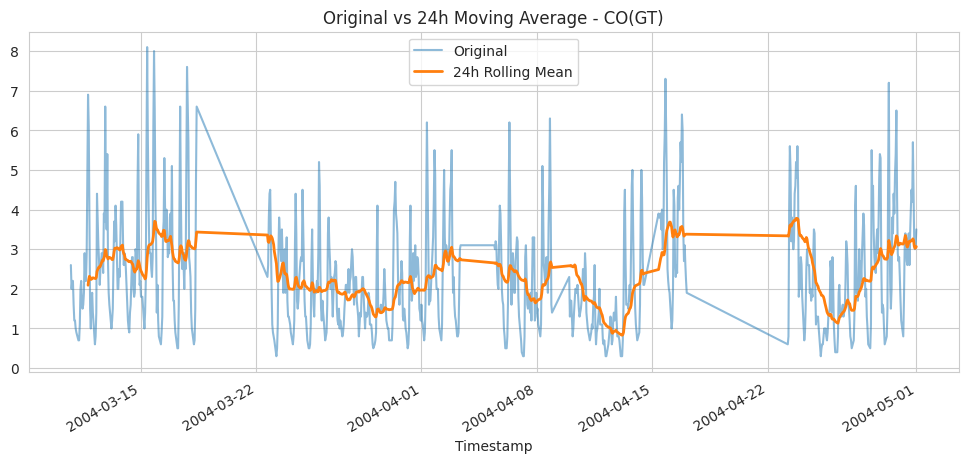

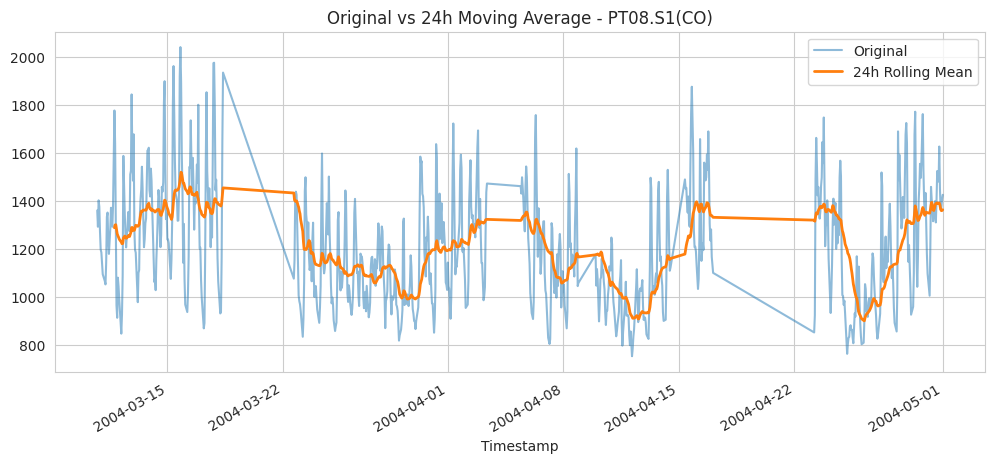

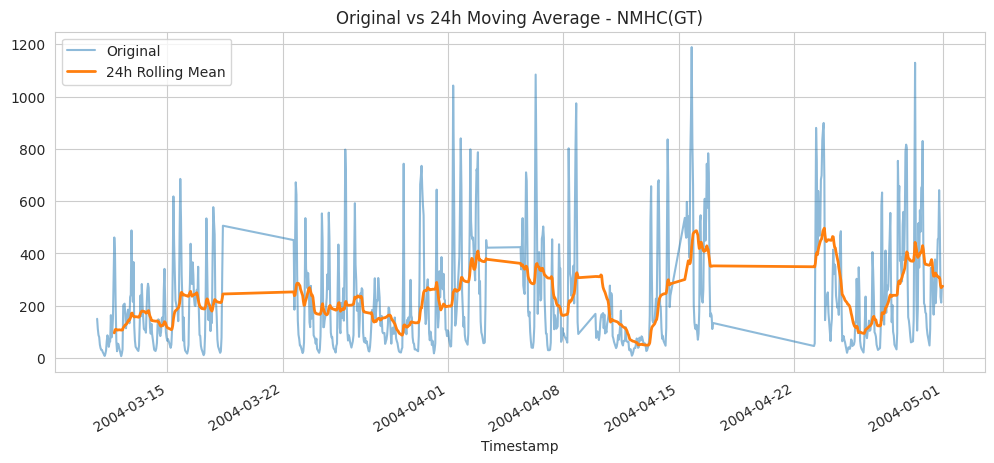

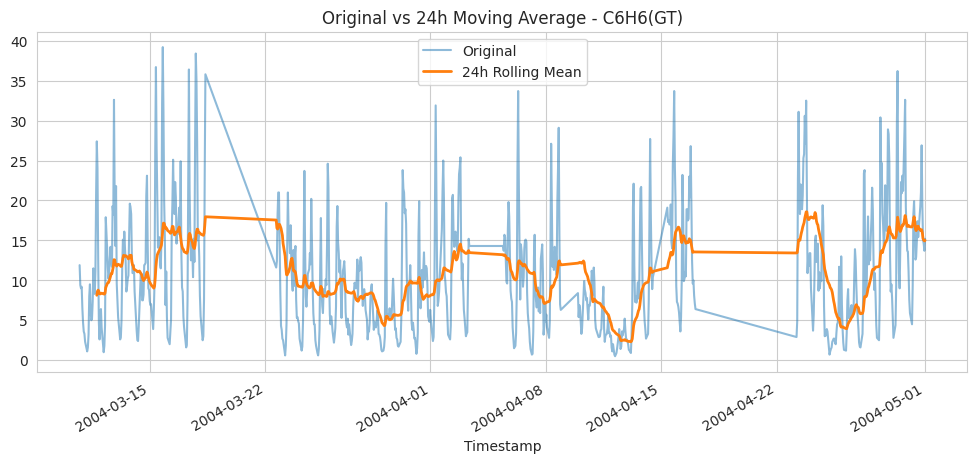

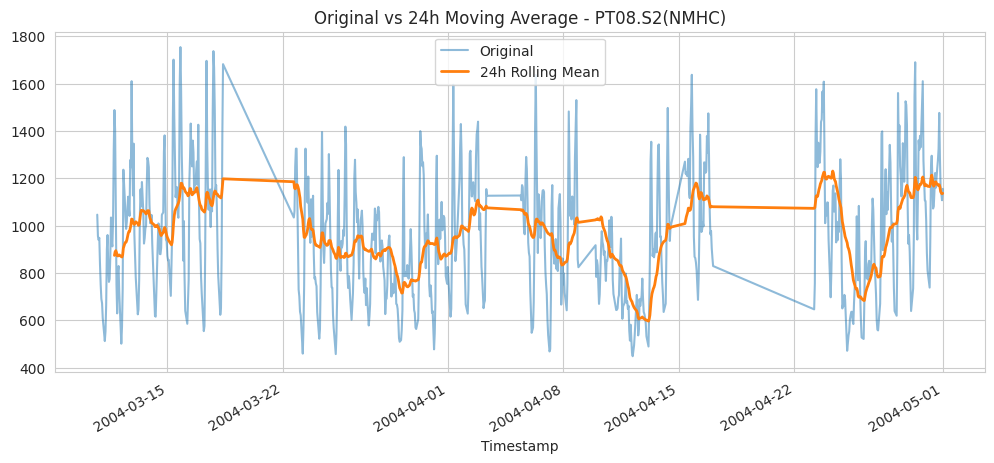

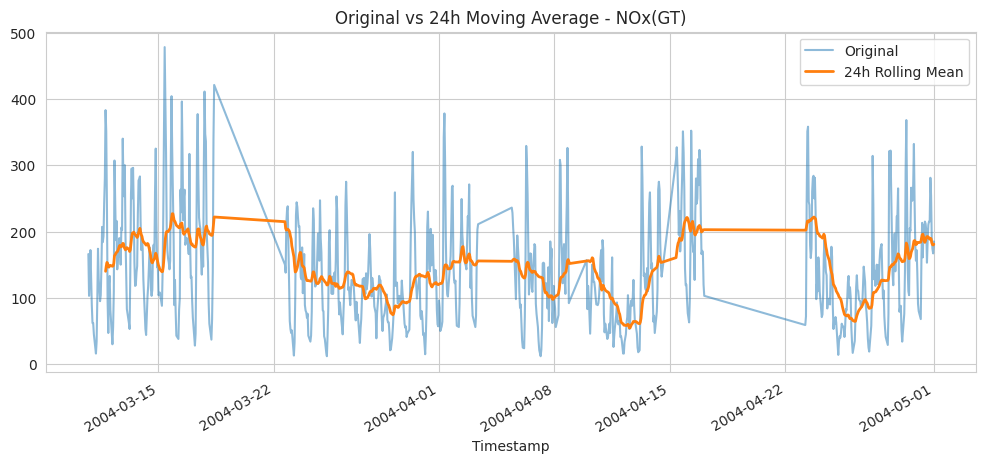

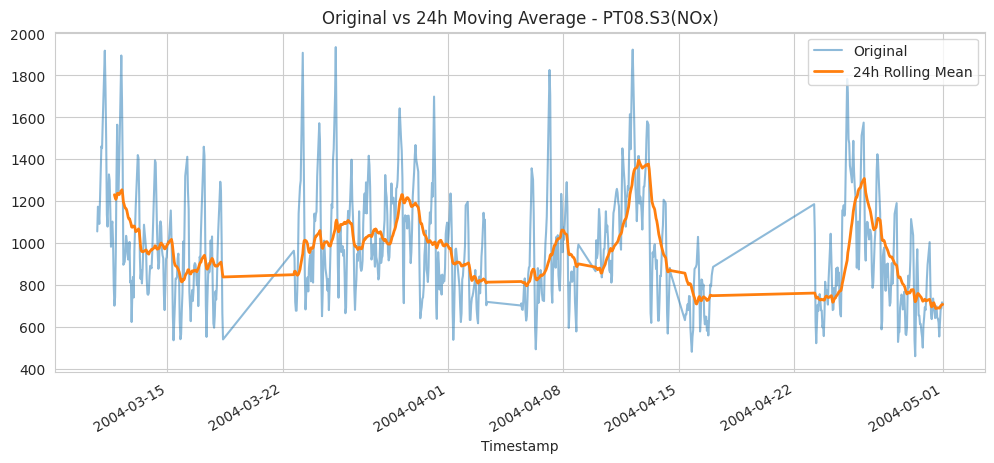

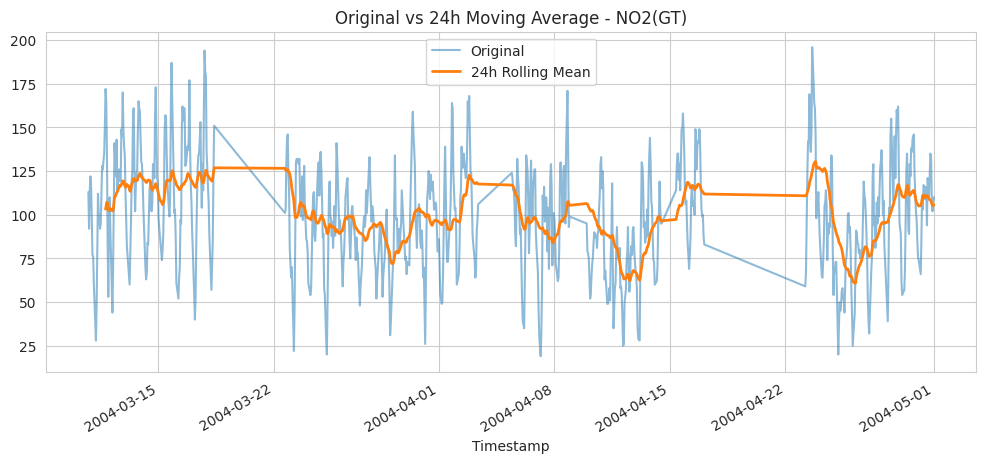

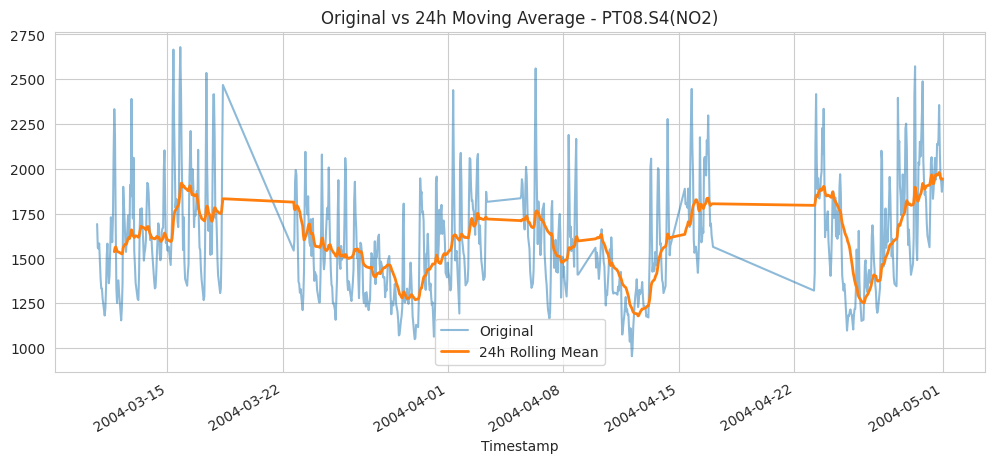

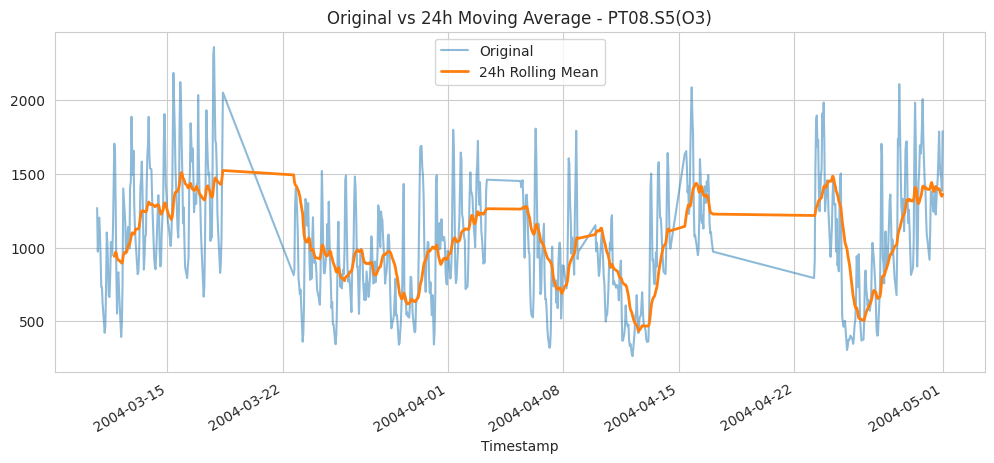

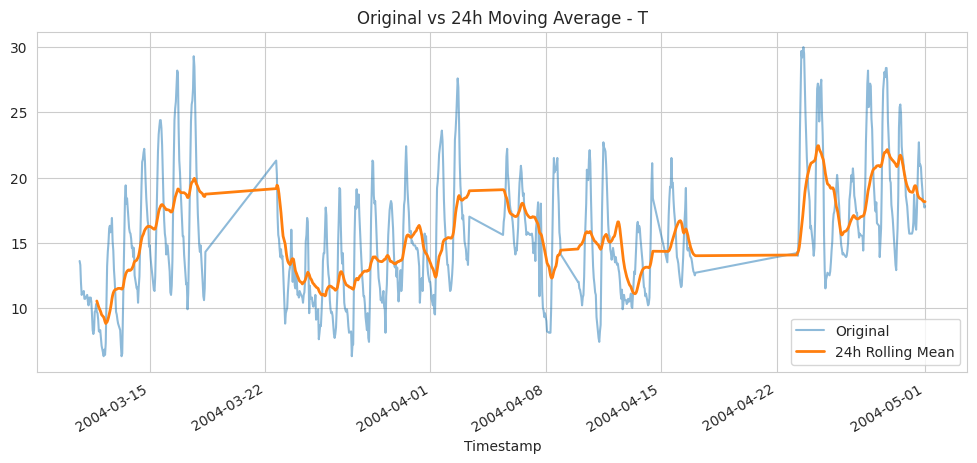

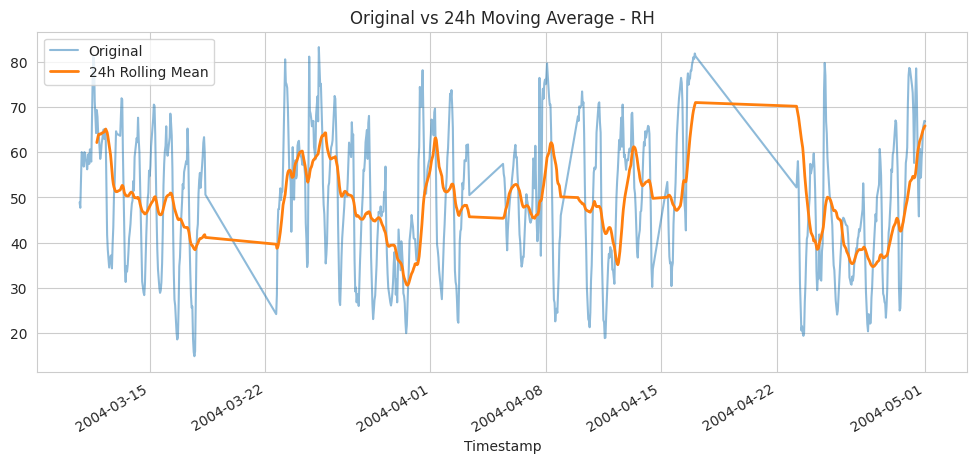

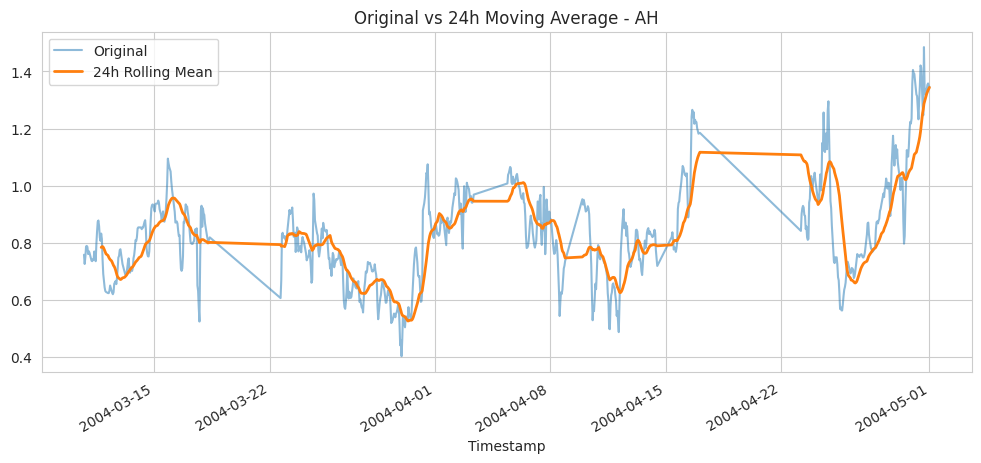

In [ ]:
for col in df.columns:
    plt.figure(figsize=(12, 5))
    df[col].plot(label='Original', alpha=0.5)
    df[col].rolling(window=24).mean().plot(label='24h Rolling Mean', linewidth=2)
    plt.title(f"Original vs 24h Moving Average - {col}")
    plt.legend()
    plt.show()


# **📚 8. Exponential Moving Average (EMA)**

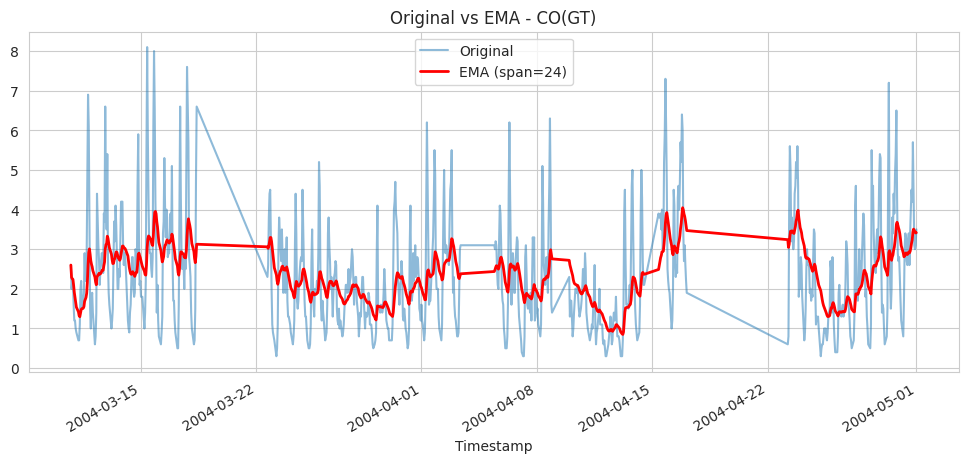

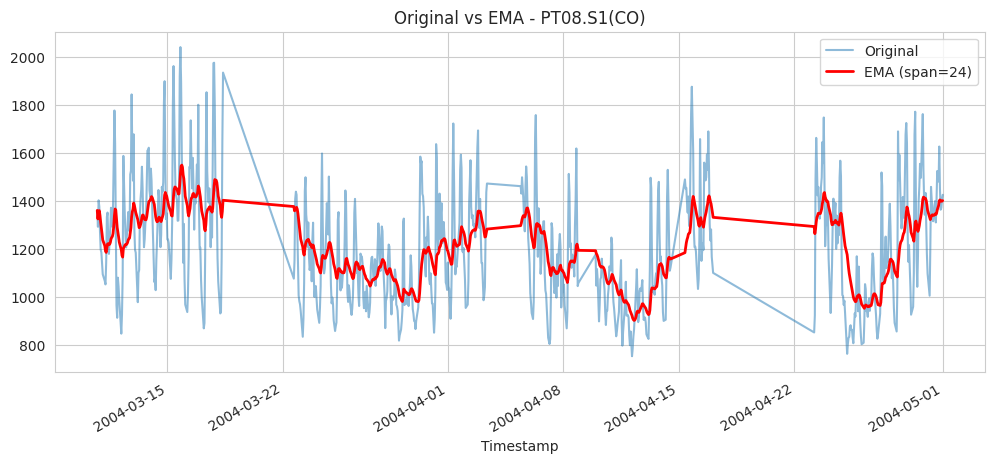

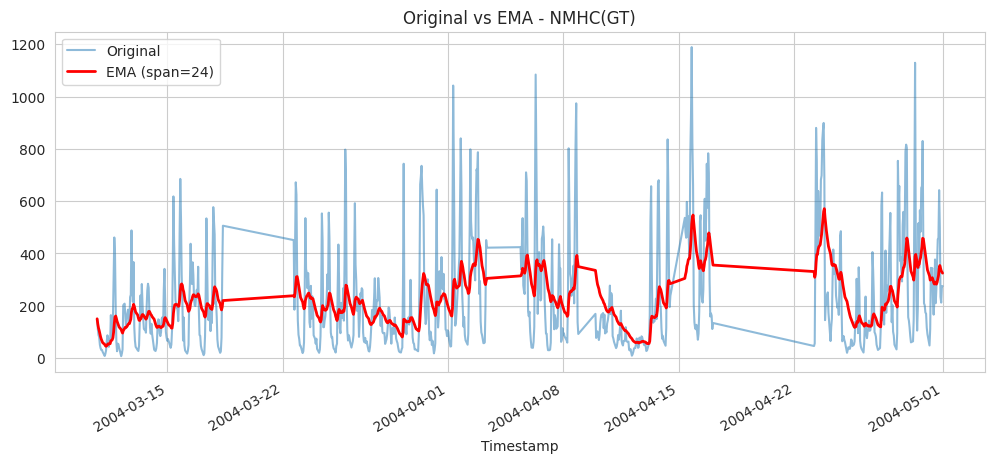

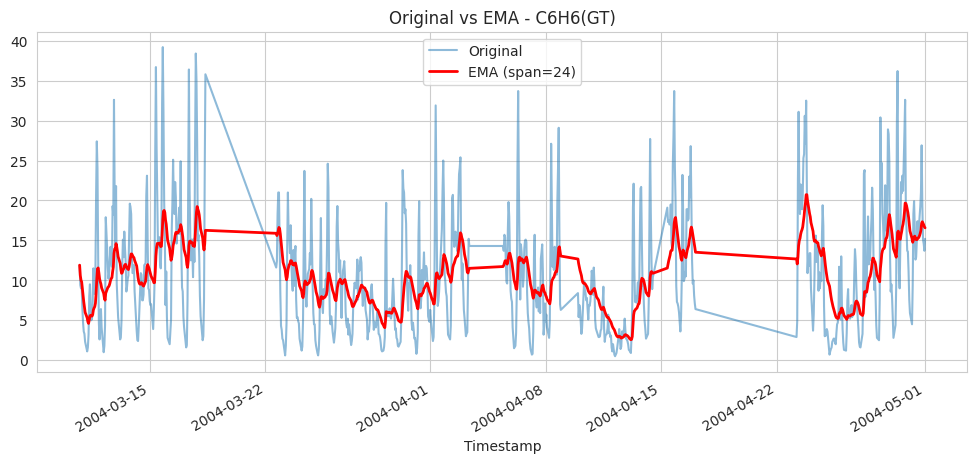

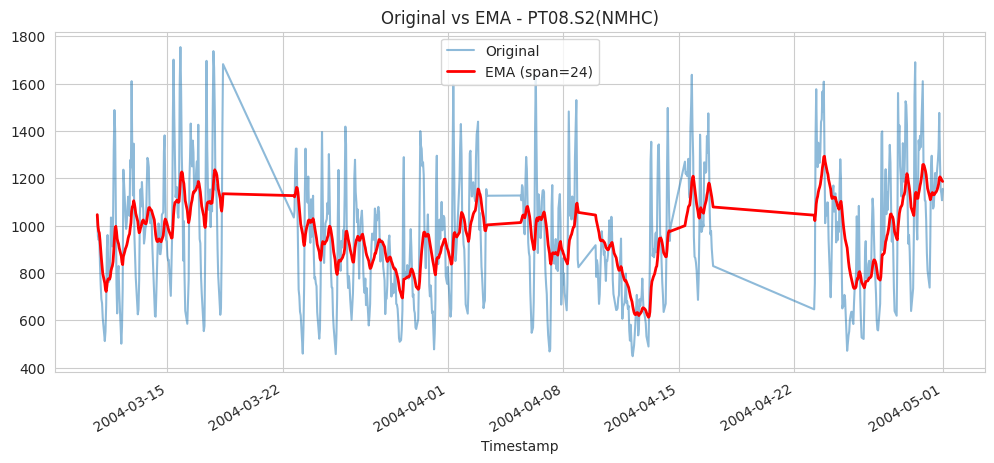

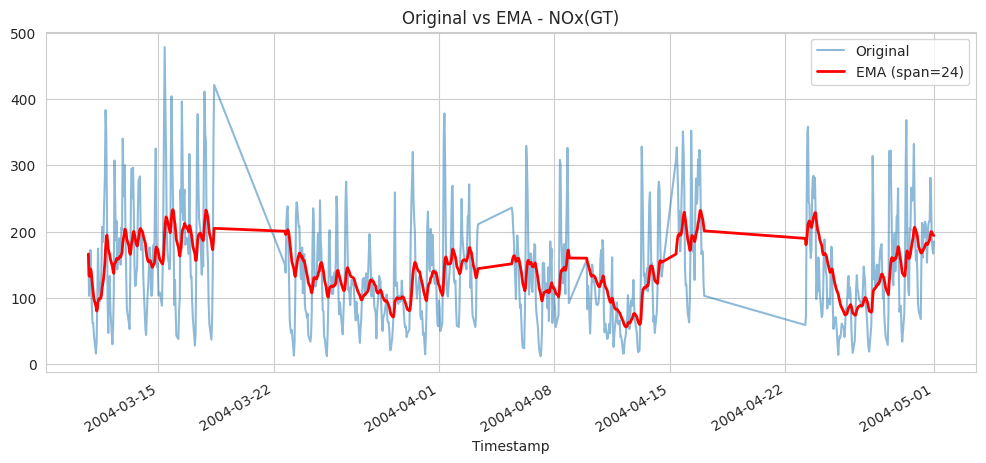

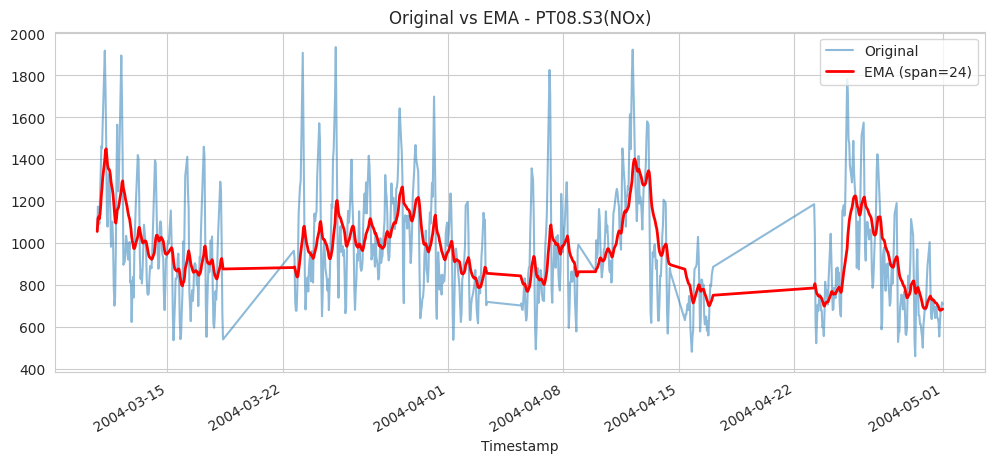

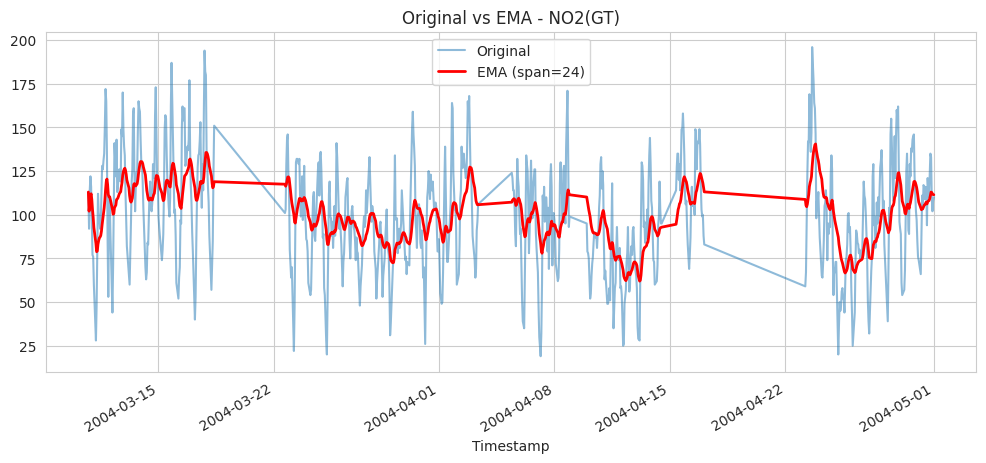

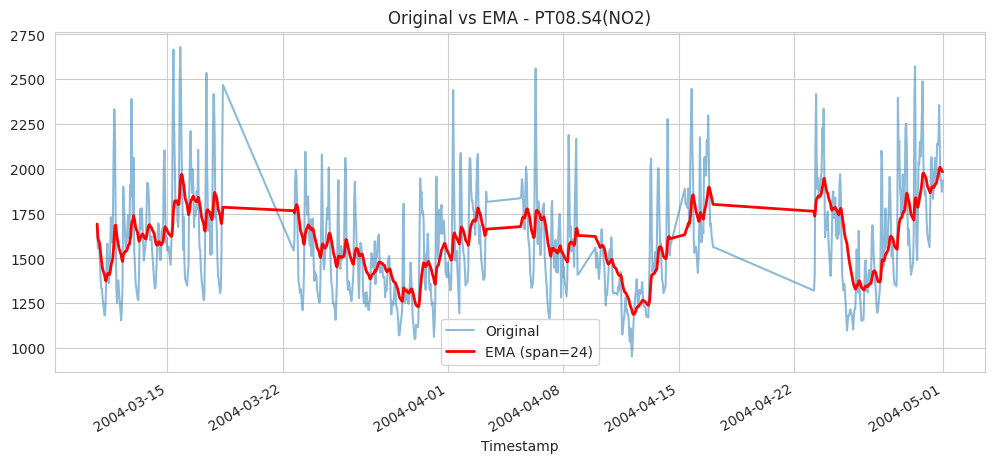

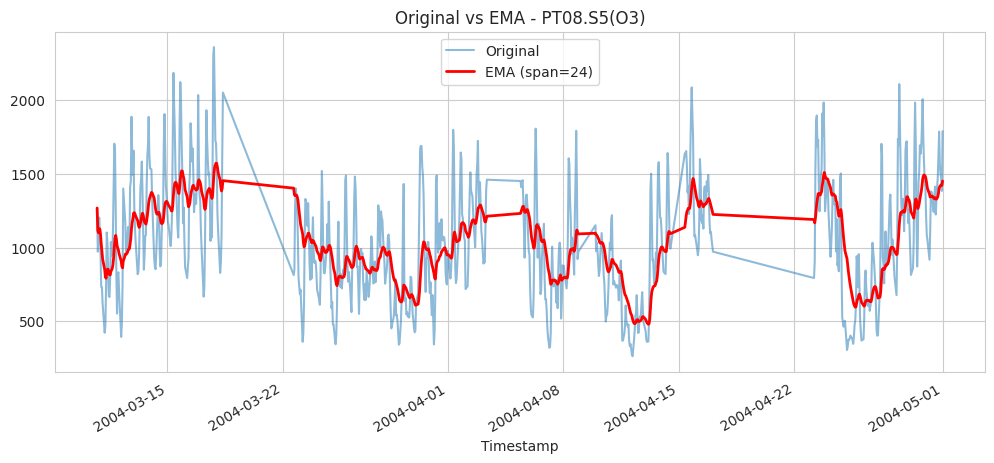

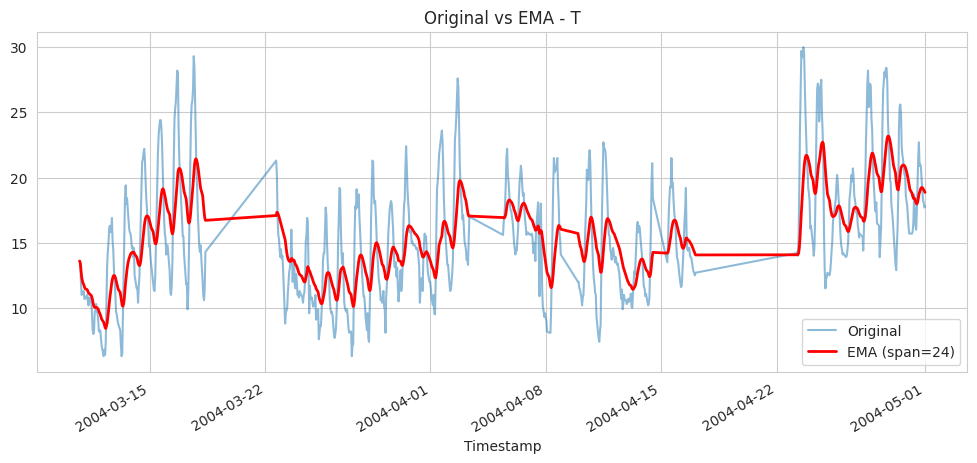

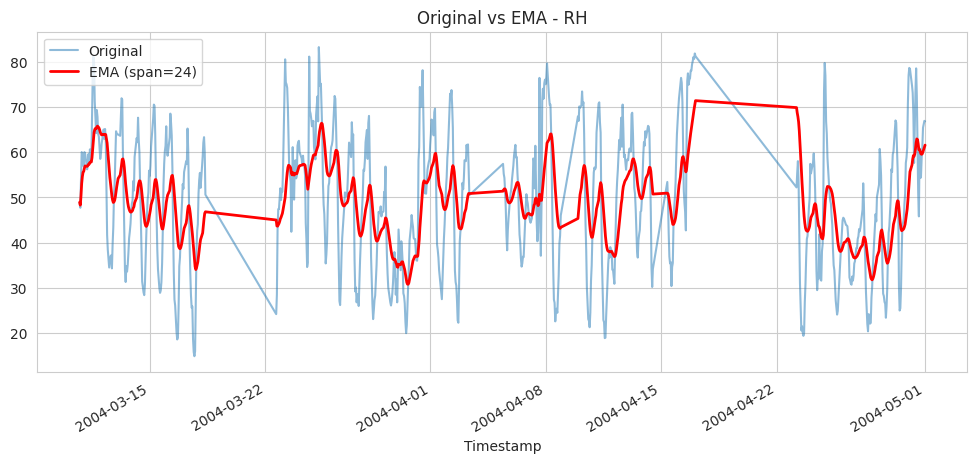

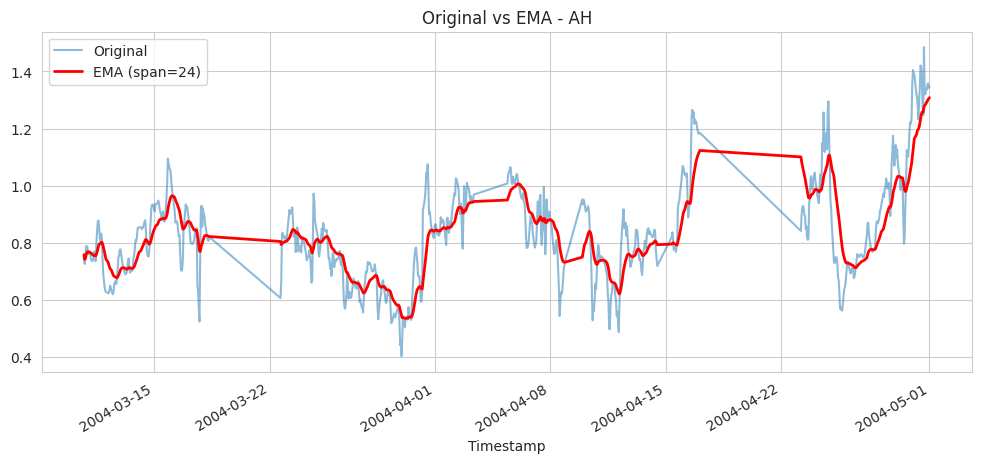

In [ ]:
for col in df.columns:
    plt.figure(figsize=(12, 5))
    df[col].plot(label='Original', alpha=0.5)
    df[col].ewm(span=24).mean().plot(label='EMA (span=24)', linewidth=2, color='red')
    plt.title(f"Original vs EMA - {col}")
    plt.legend()
    plt.show()


# **📚 9. Forecast Evaluation (Naive RMSE)**

In [ ]:
for col in df.columns:
    y_true = df[col][1:]
    y_pred = df[col][:-1]
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"RMSE for {col}: {rmse:.4f}")


RMSE for CO(GT): 0.9479
RMSE for PT08.S1(CO): 145.3579
RMSE for NMHC(GT): 143.0847
RMSE for C6H6(GT): 4.7801
RMSE for PT08.S2(NMHC): 156.1715
RMSE for NOx(GT): 52.6196
RMSE for PT08.S3(NOx): 140.2419
RMSE for NO2(GT): 17.6778
RMSE for PT08.S4(NO2): 184.8941
RMSE for PT08.S5(O3): 206.0223
RMSE for T: 1.5075
RMSE for RH: 5.8810
RMSE for AH: 0.0471
